# Exploratory Data Analysis

## Purpose
In this notebook, we look in details into the shooters data to extract some preliminary trends and outstanding phenomena. We perform some very preliminary feature engineering to more easily aggregate, display and compare categorical data. In the last section, we compare some high level shooter data statistics with the general population.

## Data Sources
- **Shooter information**: Peterson, J., & Densley, J. (2023). The Violence Project database of mass shootings in the United States (Version 7). https://www.theviolenceproject.org
- **Mental Illness Information**: States with the highest levels of mental health illness - NiceRx. https://worldpopulationreview.com/state-rankings/mental-health-statistics-by-state
- **Arrests by State**: Federal Bureau of Investigation (2018). https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/topic-pages/tables/table-69 (Data for Iowa based on 2019 figures due to lack of information in 2018)
- **Autism prevalence**: National Library of Medicine, J Autism Dev Disord. 2020 Dec; 50(12): 4258–4266. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9128411/table/T2/
- **Male/Female ratio**: UN (World Population Prospects 2022) https://population.un.org/wpp/Download/Standard/Population/
- **Other census datan**: U.S. Census Bureau (2018-2021). Accessed through `census` Python module API

In [38]:
import pandas as pd
from pathlib import Path

import seaborn as sns
from matplotlib import pyplot as plt

# Ignnore warning
import warnings
warnings.simplefilter(action='ignore')

## Functions

In [39]:
# Define plot parameters
main_color = '#969696'
highlight_color = '#04bfb3'
default_figsize = (10,6)

In [76]:
def corr_heatmap(corr_matrix, title='Correlation Matrix'):
    # Display correlation matrix
    fig, ax = plt.subplots(figsize=default_figsize)

    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        ax=ax,
        cmap=sns.color_palette(f"light:{highlight_color}", as_cmap=True)
        )

    ax.set_title(title)

    plt.show()

In [41]:
# Boxplot function
def display_boxplot(df, x_feat, y_feat):
    fig, ax = plt.subplots(figsize=default_figsize)
    sns.despine()
    sns.boxplot(
        df,
        x = x_feat,
        y = y_feat,
        palette=[main_color]
    )
    ax.set_title(y_feat)
    ax.set_ylabel('')
    plt.show()

In [42]:
def display_barchart(pivot_table, legend_title):
    fig, ax = plt.subplots(figsize=default_figsize)

    sns.despine()

    ax.barh(
        y=pivot_table.index,
        width=pivot_table[1],
        color=main_color,
        label='Yes'
    )

    ax.barh(
        y=pivot_table.index,
        width=pivot_table[0],
        color=highlight_color,
        left=pivot_table[1],
        label='No'
    )

    ax.legend(title=legend_title)
    ax.set_title(pivot_table.index.name)
    ax.set_xlabel('Count')

    plt.show()



In [43]:
def display_categorical_features(source_df, cat_df, feat):
    for y in cat_df:
        feature_feature_df = pd.DataFrame(source_df[[feat,y]].groupby([feat,y], as_index=False).value_counts()).rename(columns={0:'count'})

        pivot = feature_feature_df.pivot_table(
            index=y,
            columns=feat,
            values='count'
        )

        display_barchart(pivot.fillna(0), feat)

In [150]:
def display_comparison_chart(national_mean, shooter_mean, title):
    fig, ax = plt.subplots(figsize=default_figsize)
    sns.despine()
    ax.bar(x = ['General Population', 'Shooters'], height=[national_mean, shooter_mean], color=[main_color, highlight_color])
    ax.annotate(f"{national_mean:.1f}%", [0,national_mean], fontsize=14, horizontalalignment='center', verticalalignment='bottom')
    ax.annotate(f"{shooter_mean:.1f}%", [1,shooter_mean], fontsize=14, horizontalalignment='center', verticalalignment='bottom')
    ax.set_ylim(0,max([national_mean, shooter_mean])+5)
    ax.set_title(title, fontsize=18)
    plt.show()

## Import data

In [44]:
csv = Path('../Datasets/clean_data/clean_shooters_v8.csv')

In [45]:
shooters_df = pd.read_csv(csv)
shooters_df.head()

,Age,Male,Race,Immigrant,Education,RelStatus,Employed,Work,MilService,Arrested,ParentDivorce,SES,MentalIllness,MentalIllnessHistory,Autism,HealthIssues,Classification
0,25,Yes,White,No,Some college/trade school,Married,No,Unknown,Yes,Yes,No evidence,Middle class,Yes,No evidence,No evidence,Yes,1
1,18,Yes,White,No,Less than high school,Single,No,Unknown,No,No,No evidence,Middle class,Yes,No evidence,No evidence,No evidence,1
2,39,Yes,White,No,Some college/trade school,Married,Yes,In between,Yes,No,No evidence,Middle class,No evidence,No evidence,No evidence,No evidence,1
3,56,Yes,White,No,Unknown,Single,Yes,Blue collar,No,Yes,No evidence,Unknown,No evidence,No evidence,No evidence,No evidence,1
4,31,Yes,Black,No,Some college/trade school,Married,No,In between,Yes,No,Yes,Middle class,Yes,No evidence,No evidence,No evidence,1


## Feature engineering

In [46]:
shooters_feat_eng_df = shooters_df.copy().drop(columns='Classification')

### Replace the categorical features with only 2 values by binary features 

In [47]:
# Get all the features with only two unique values in a list
mask = shooters_feat_eng_df.nunique()==2
feature_with_2_values = list(shooters_feat_eng_df.nunique()[mask].index)

# Change all the 2-value features to binary columns (1 = 'Yes', 0 = 'No')
for feat in feature_with_2_values:
    shooters_feat_eng_df[feat] = [1 if c=='Yes' else 0 for c in shooters_df[feat]]

### Analyse the categorical features

In [78]:
# Get all the categorical features in a list
feature_categorical = list(shooters_feat_eng_df.dtypes[shooters_feat_eng_df.dtypes == 'object'].index)

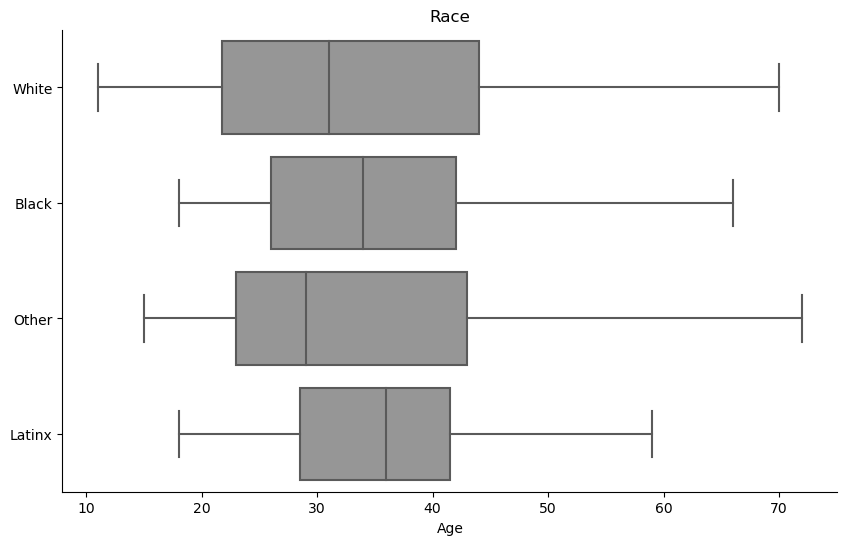

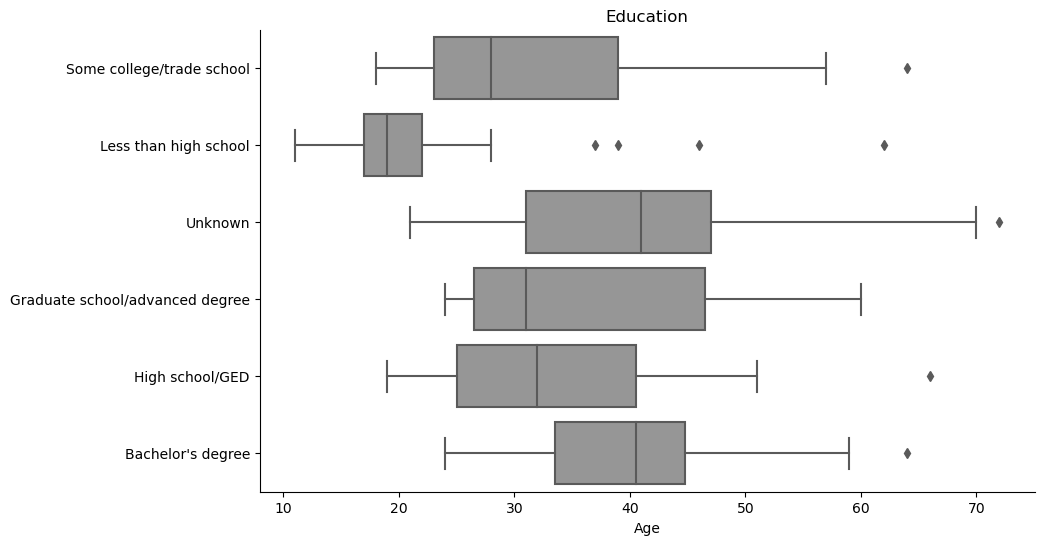

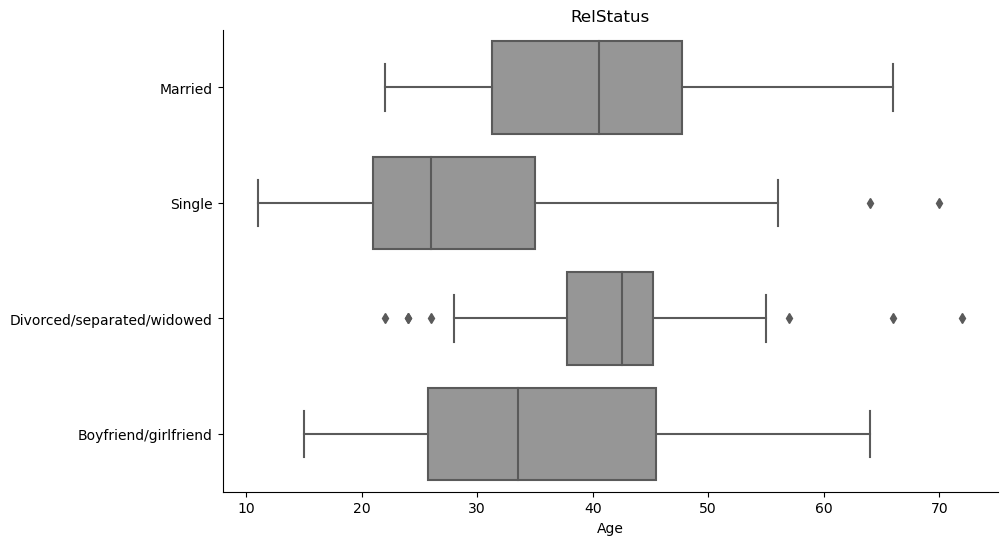

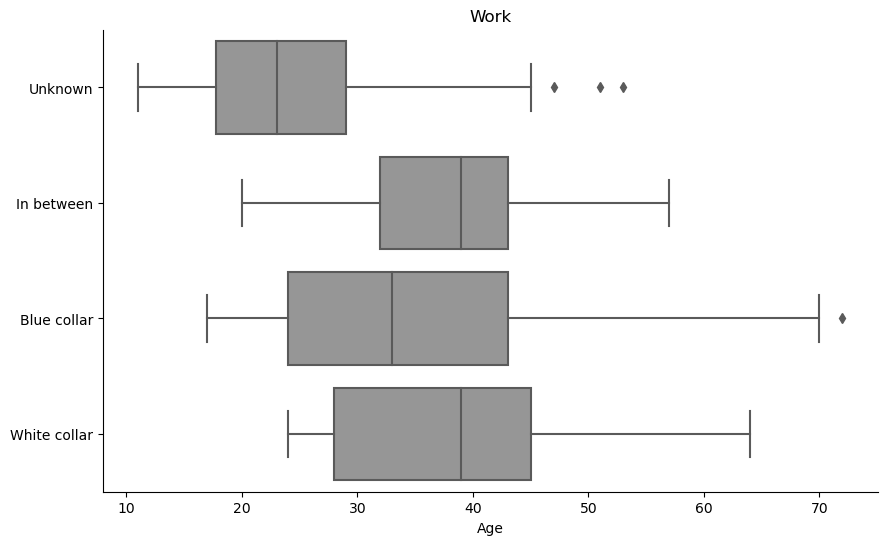

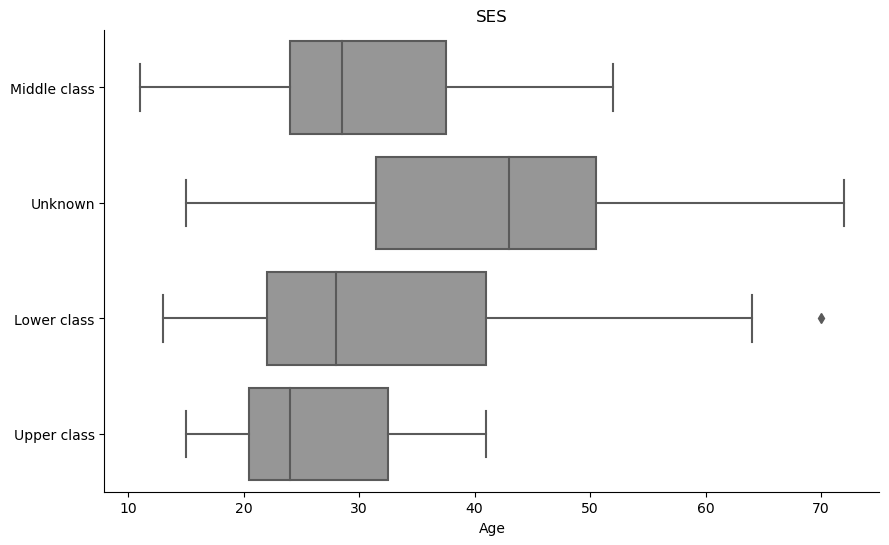

In [50]:
for feat in feature_categorical:
    display_boxplot(shooters_feat_eng_df, 'Age', feat)

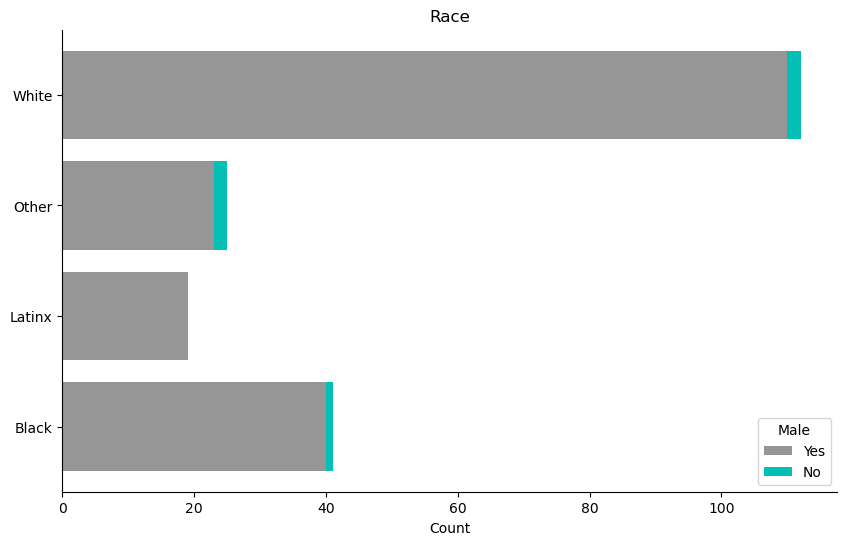

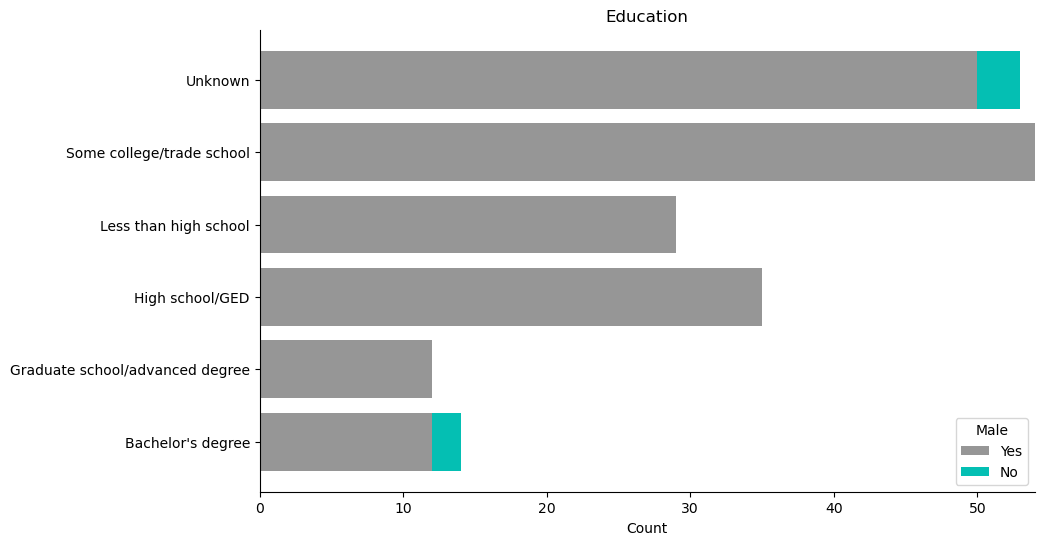

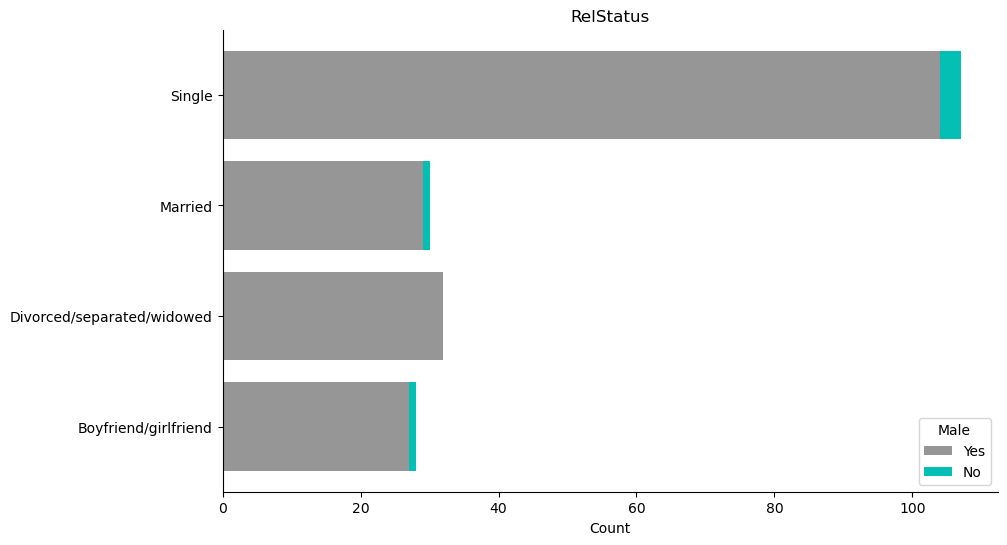

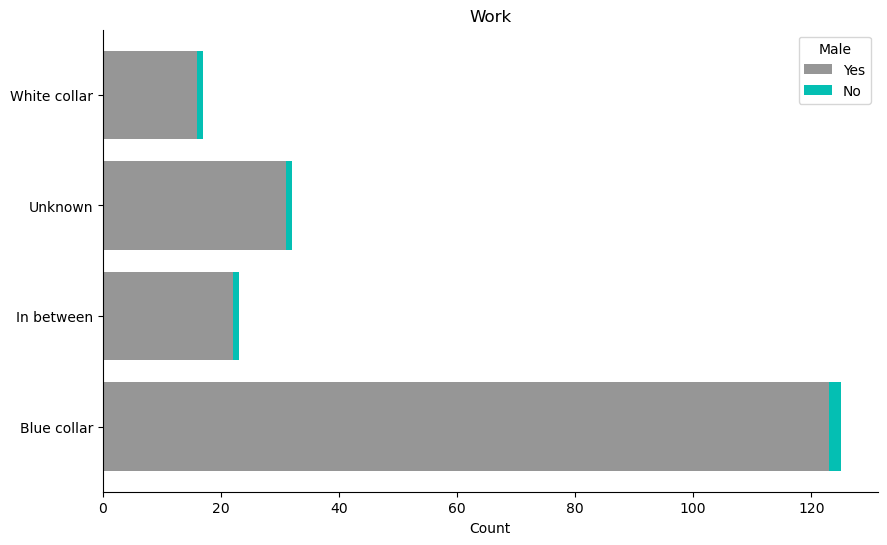

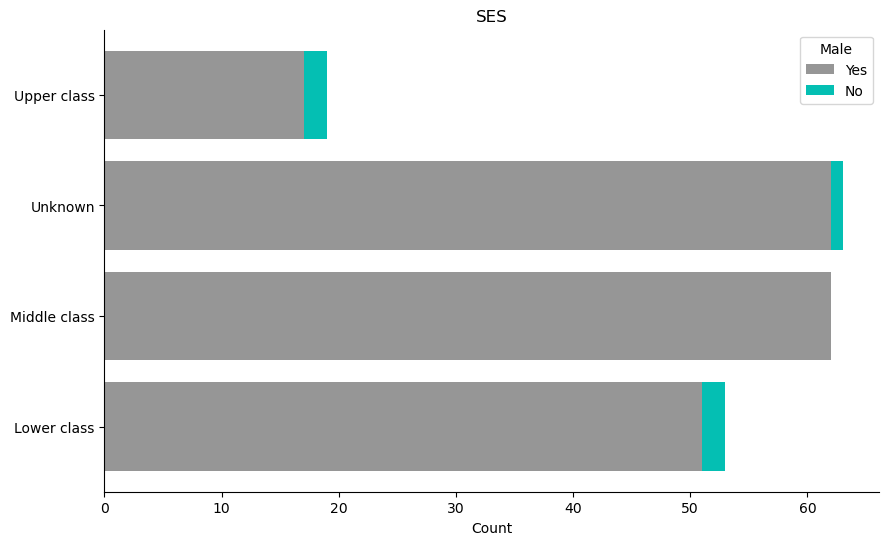

In [53]:
display_categorical_features(shooters_feat_eng_df, feature_categorical, feature_with_2_values[0])

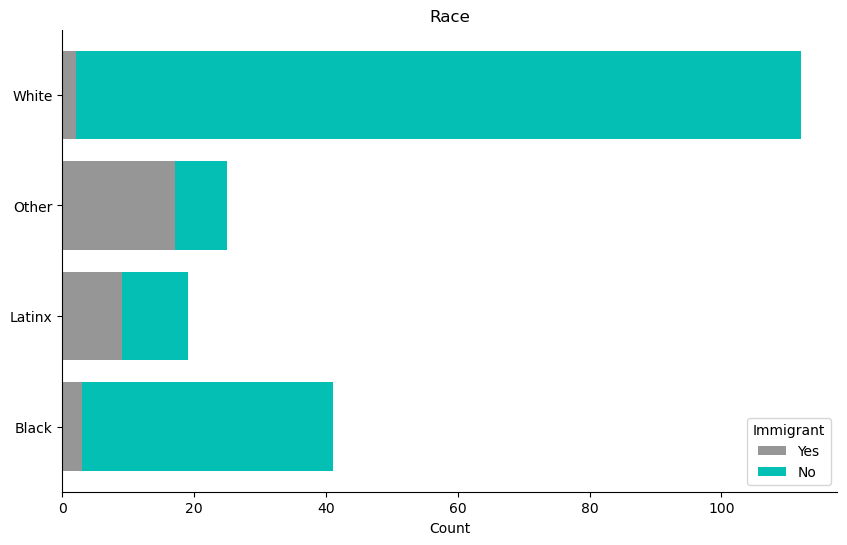

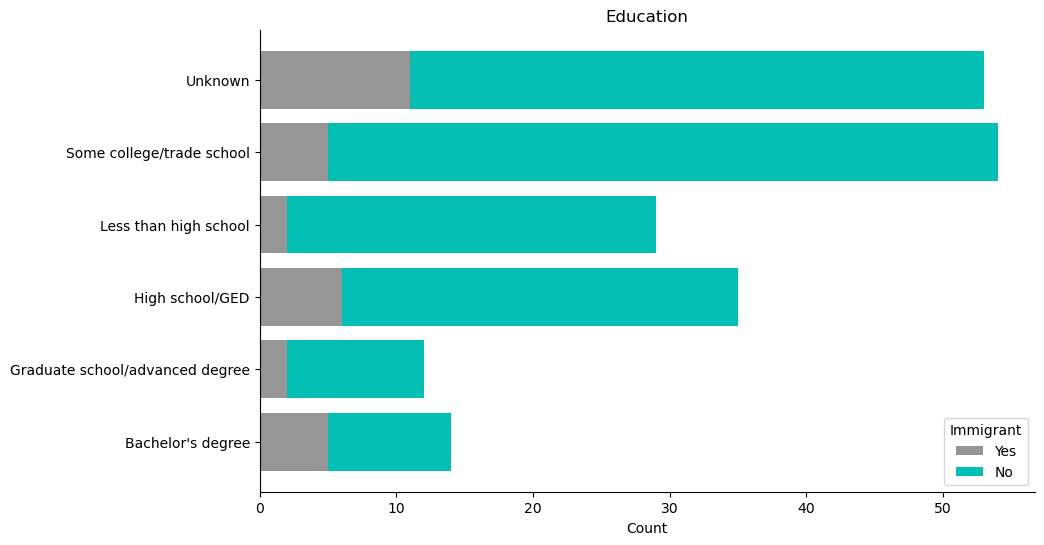

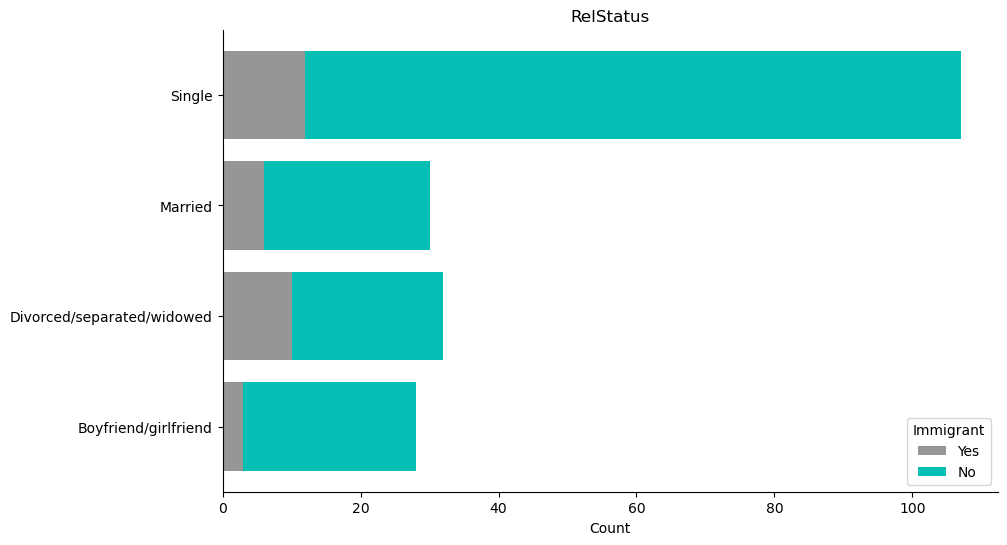

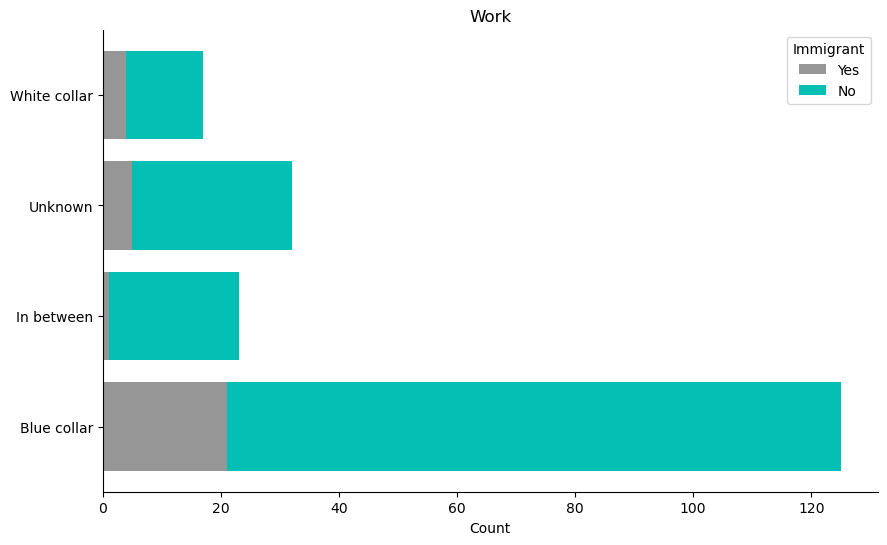

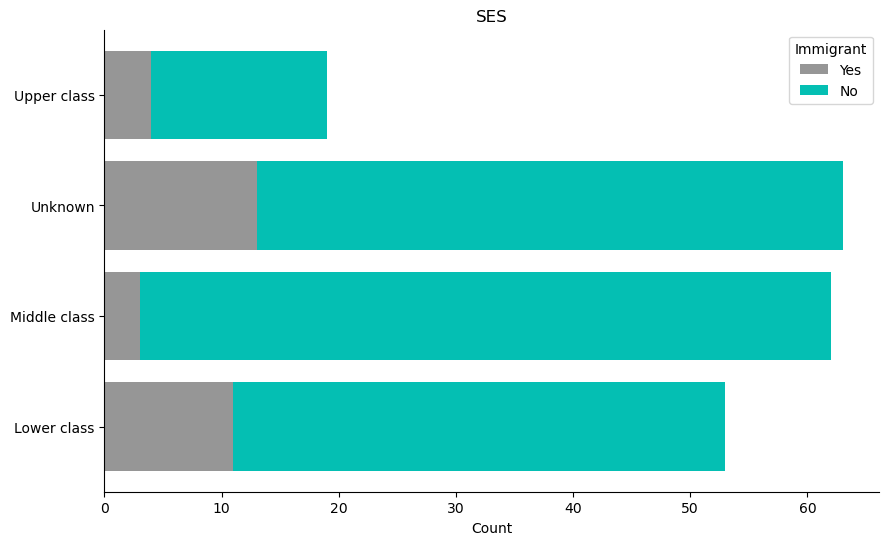

In [54]:
display_categorical_features(shooters_feat_eng_df, feature_categorical, feature_with_2_values[1])

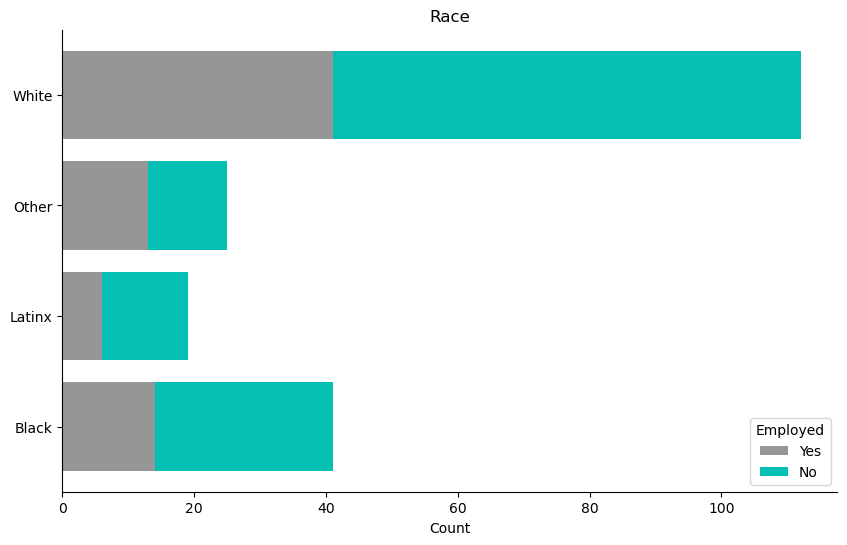

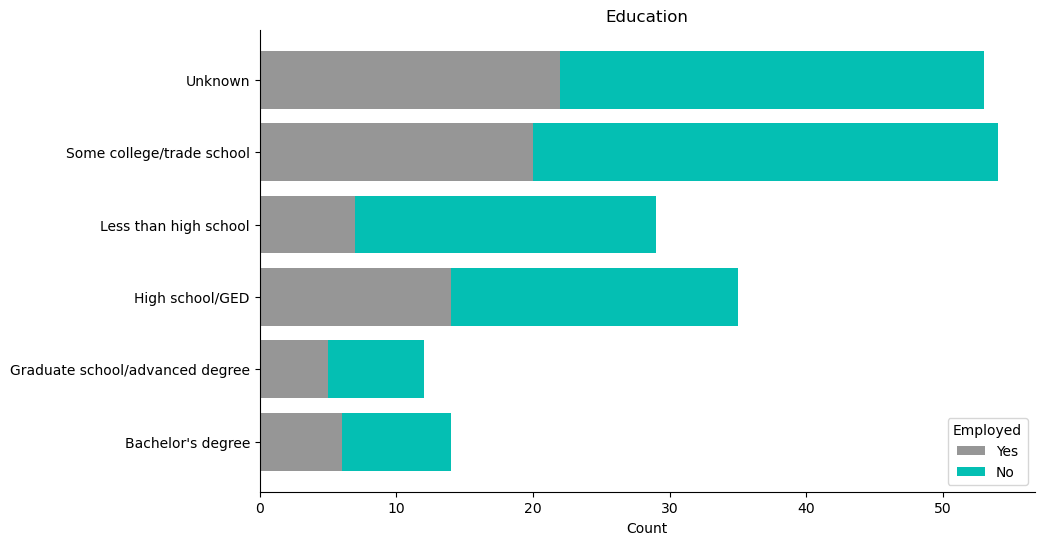

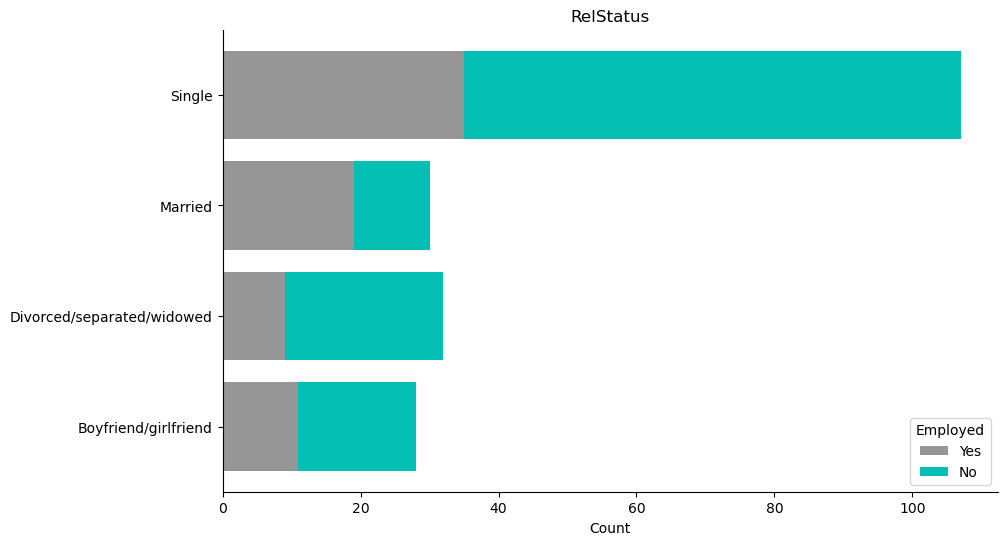

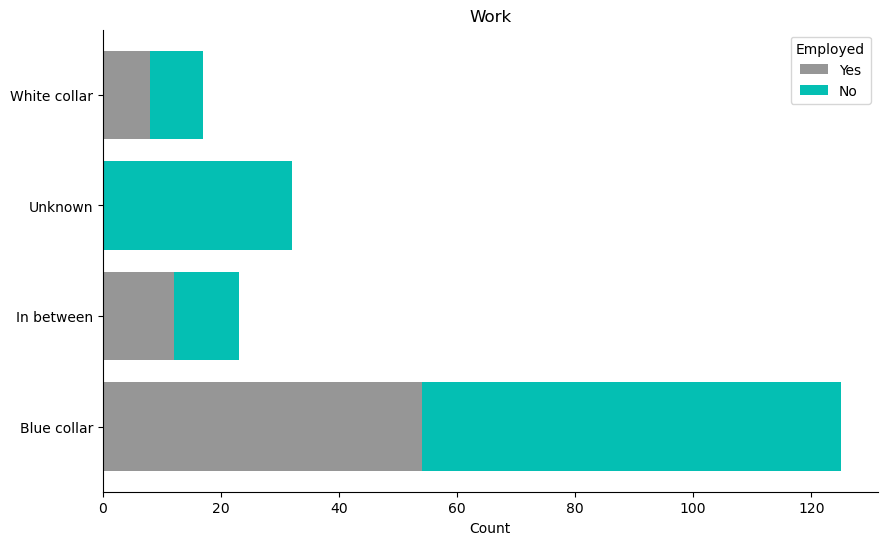

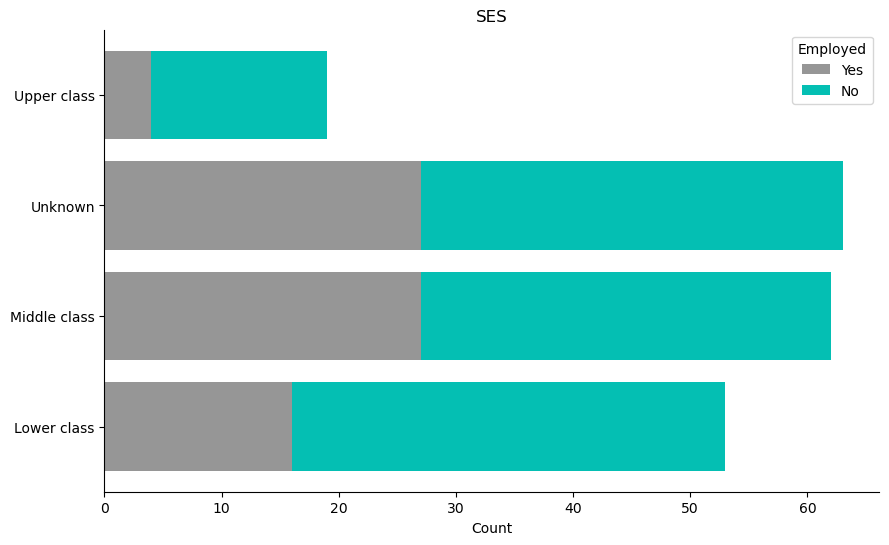

In [55]:
display_categorical_features(shooters_feat_eng_df, feature_categorical, feature_with_2_values[2])

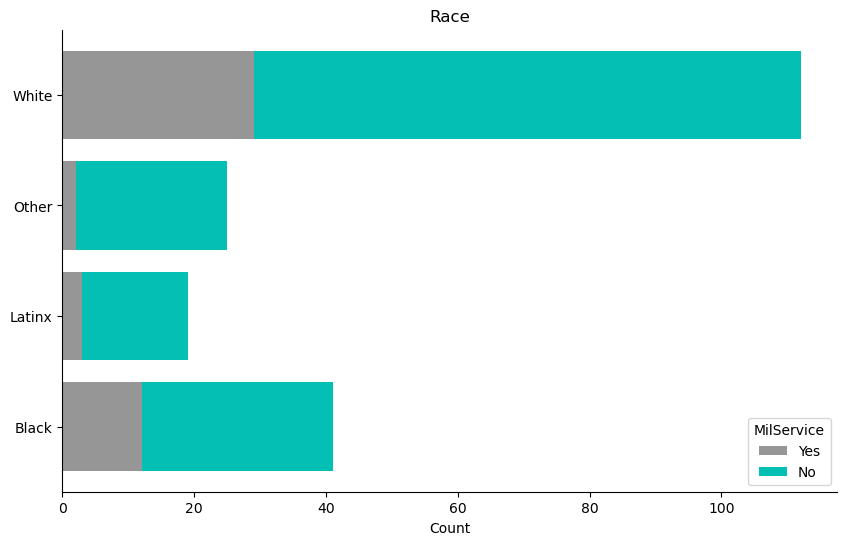

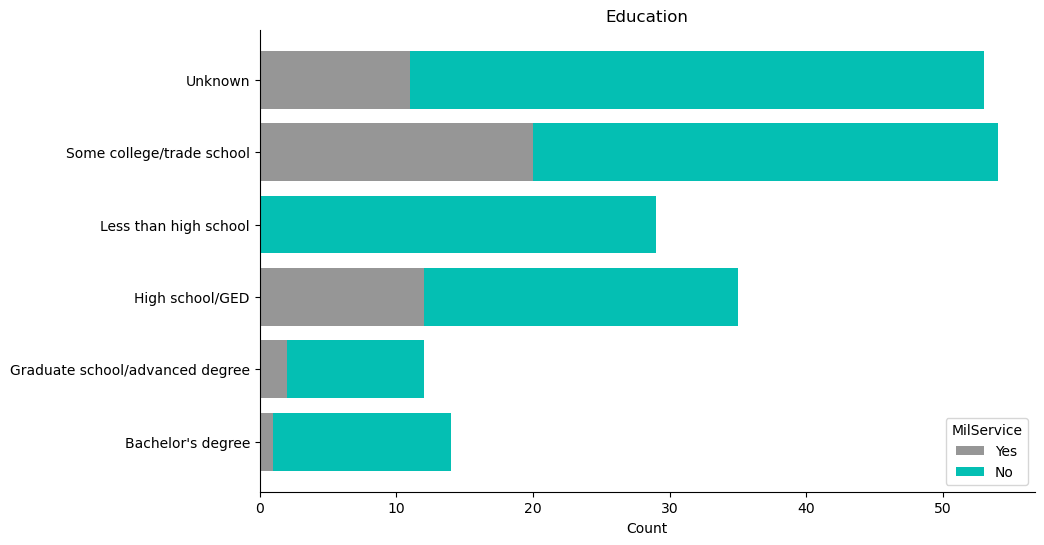

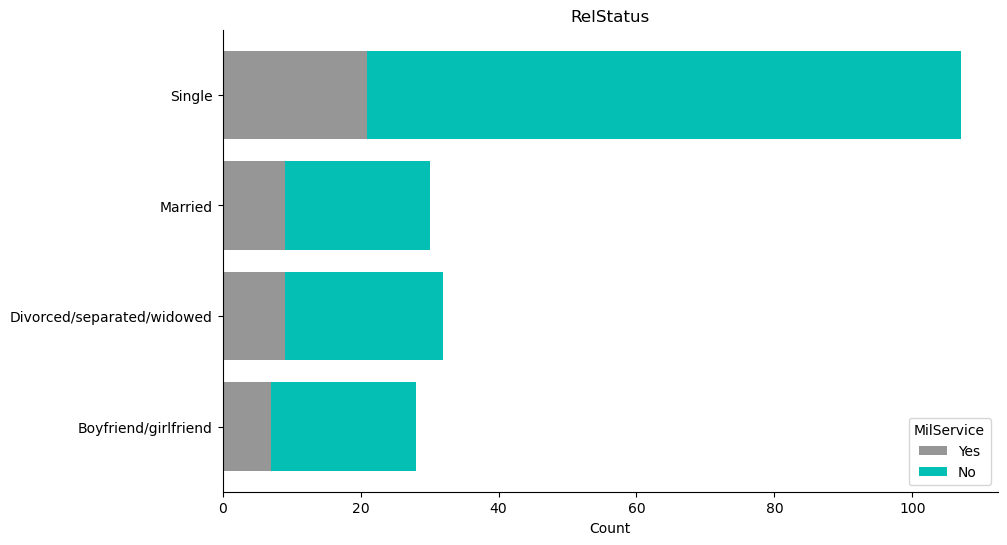

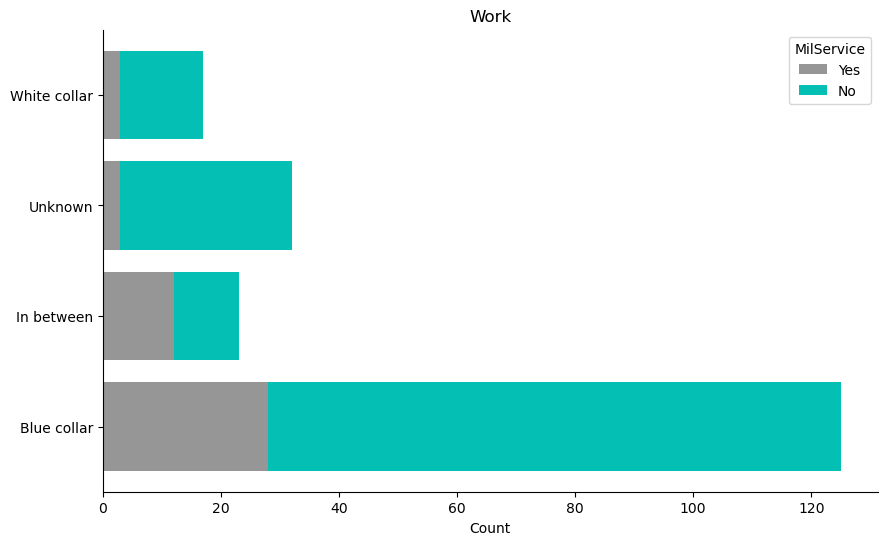

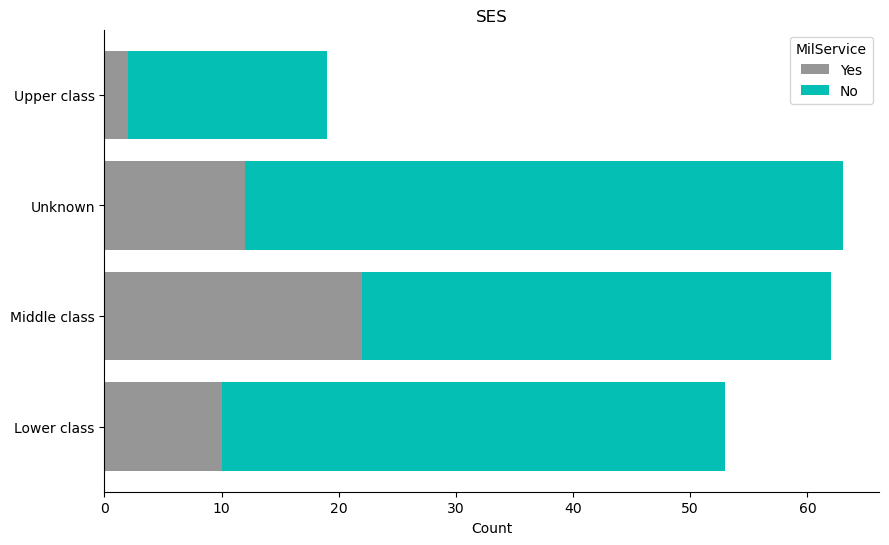

In [56]:
display_categorical_features(shooters_feat_eng_df, feature_categorical, feature_with_2_values[3])

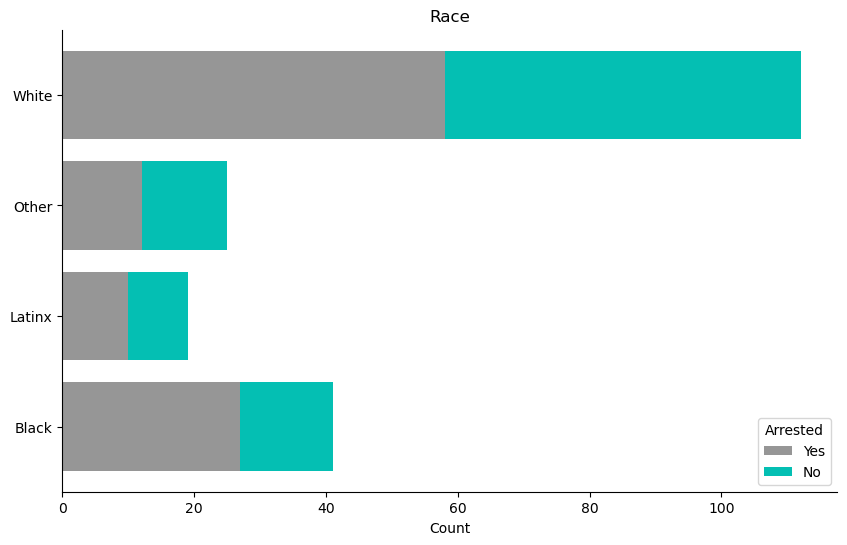

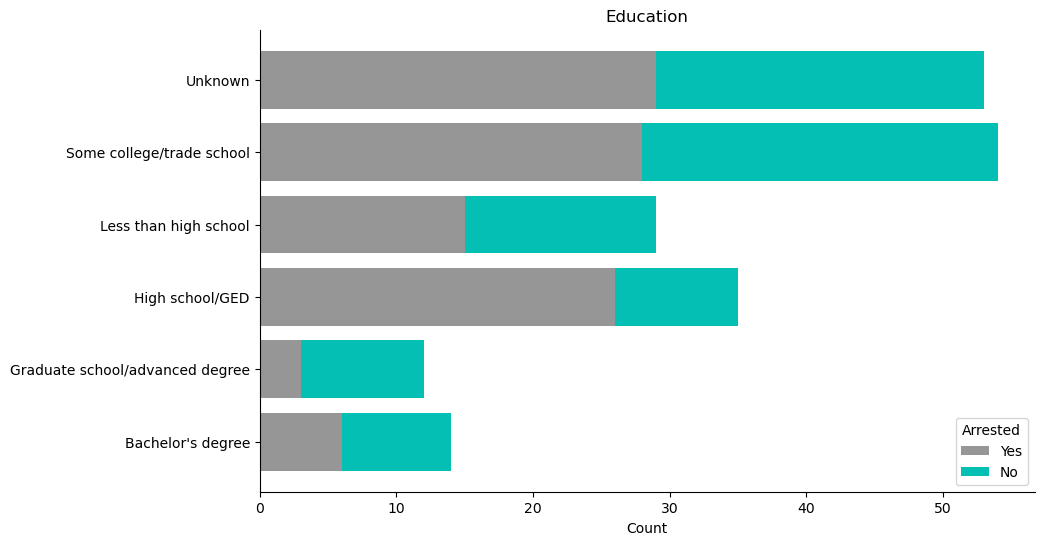

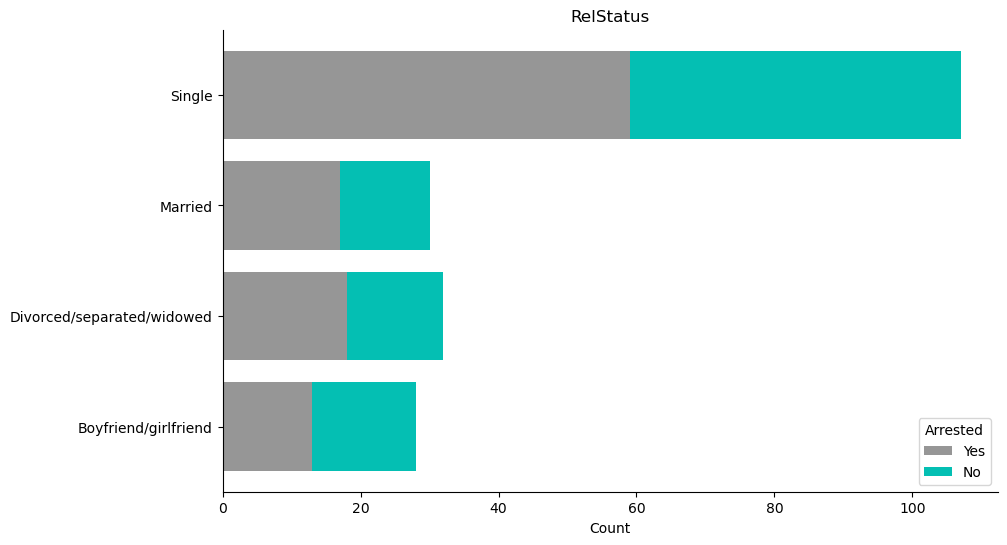

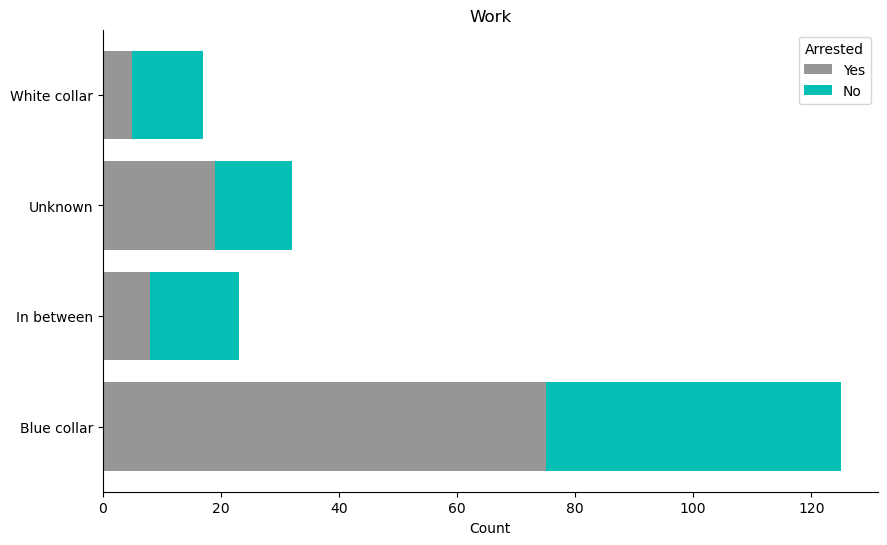

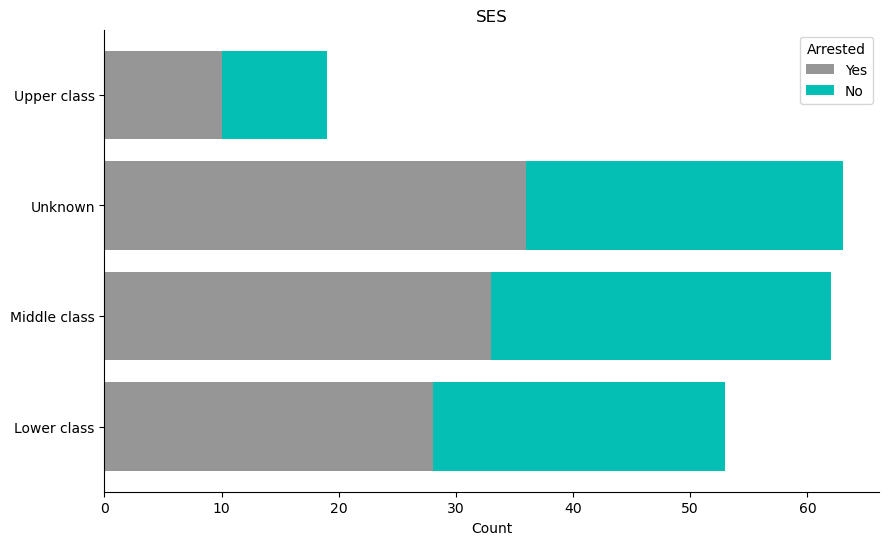

In [57]:
display_categorical_features(shooters_feat_eng_df, feature_categorical, feature_with_2_values[4])


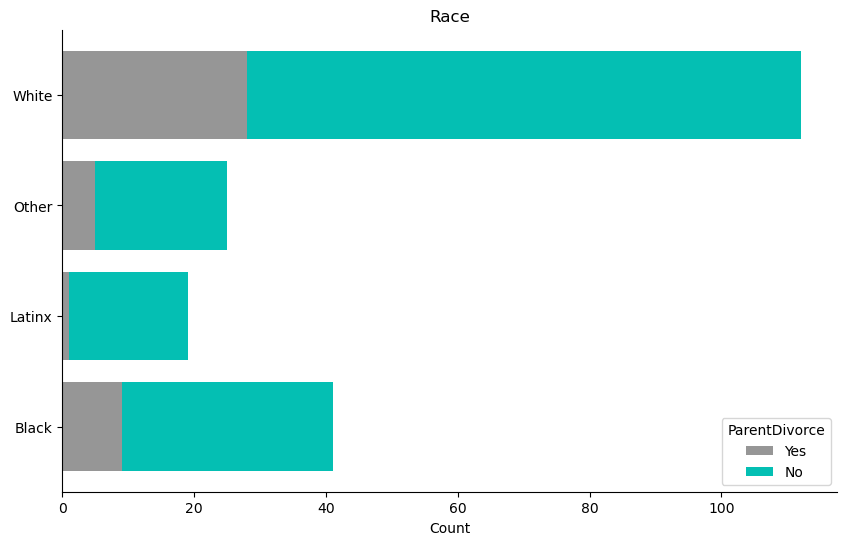

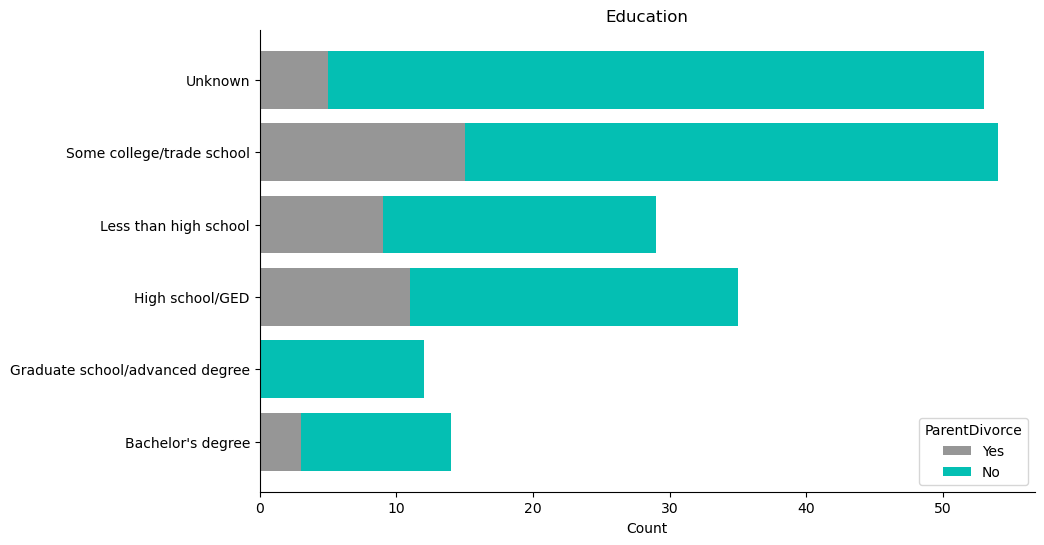

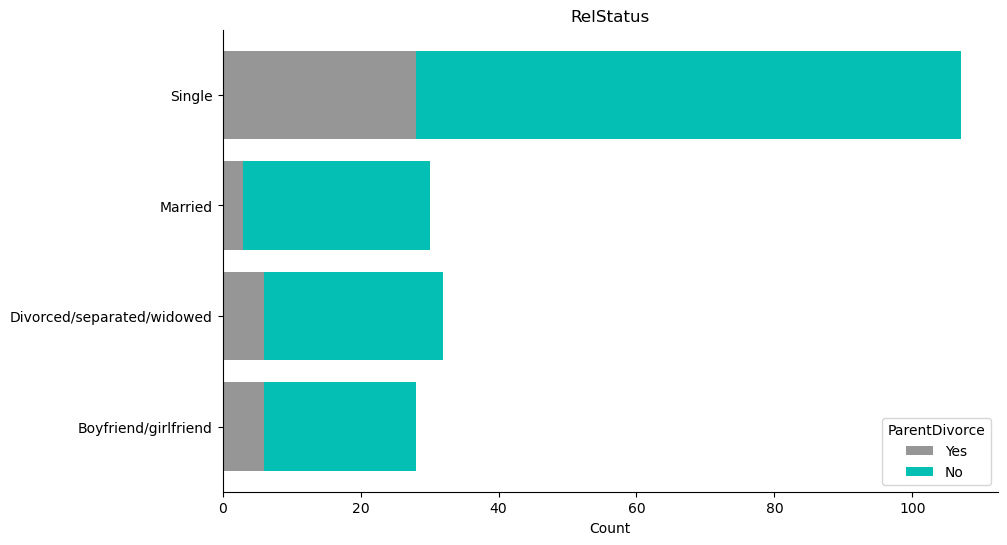

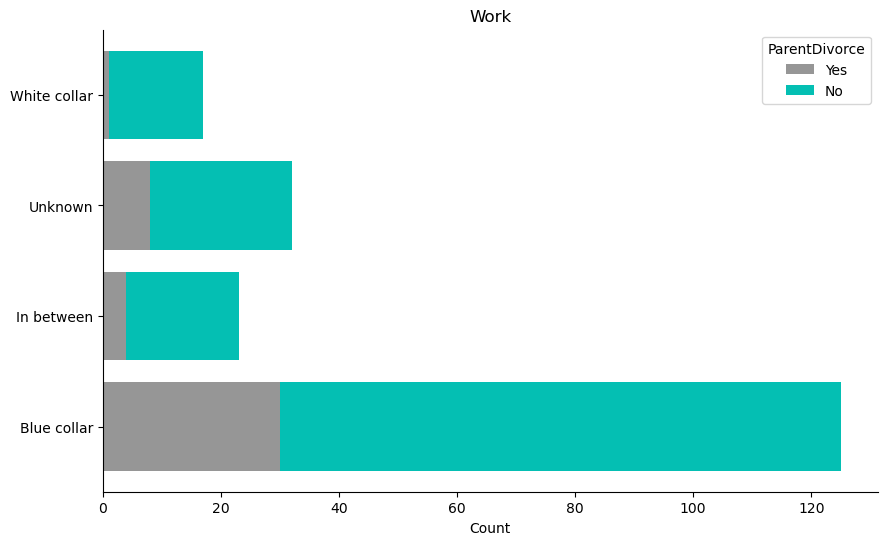

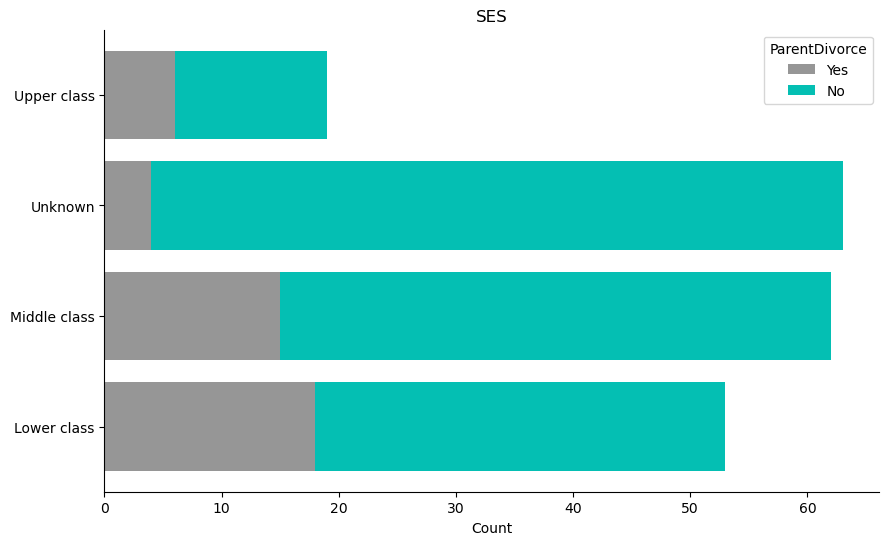

In [58]:
display_categorical_features(shooters_feat_eng_df, feature_categorical, feature_with_2_values[5])


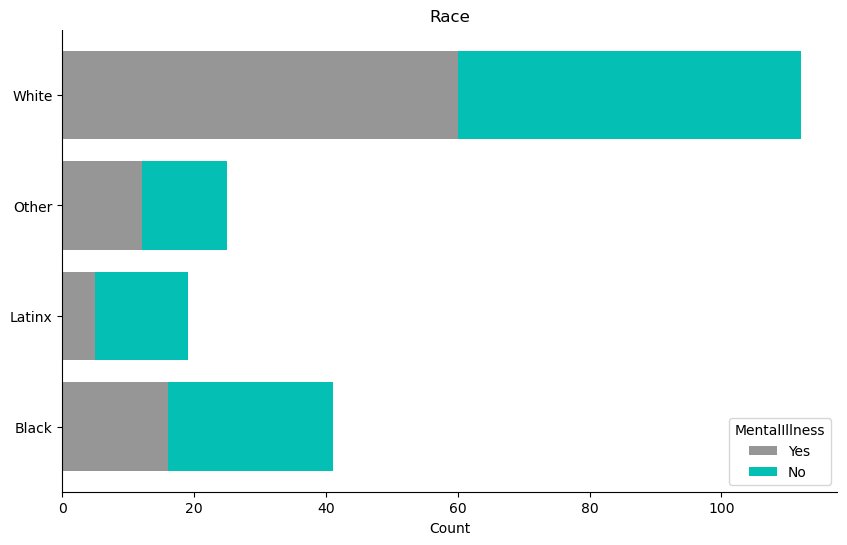

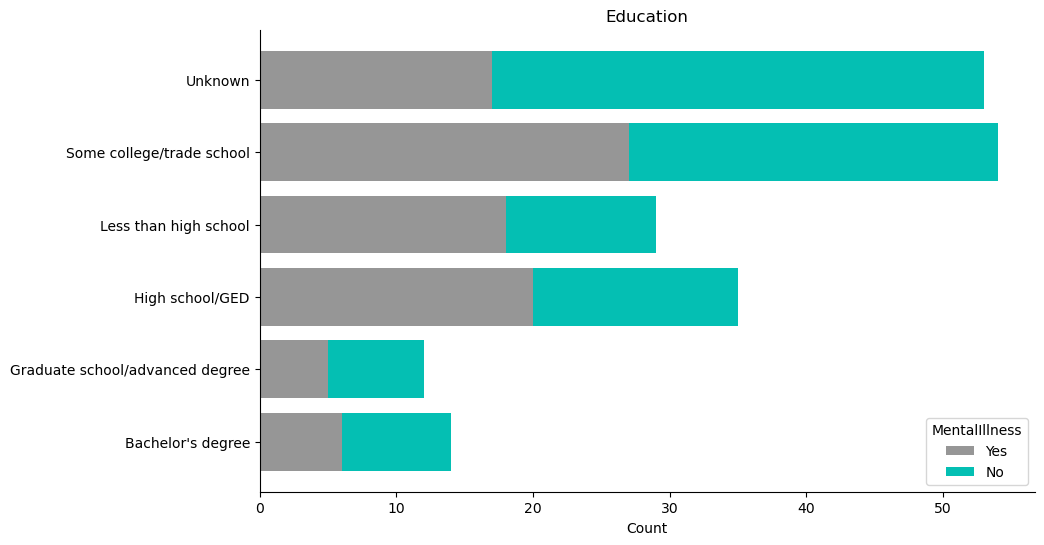

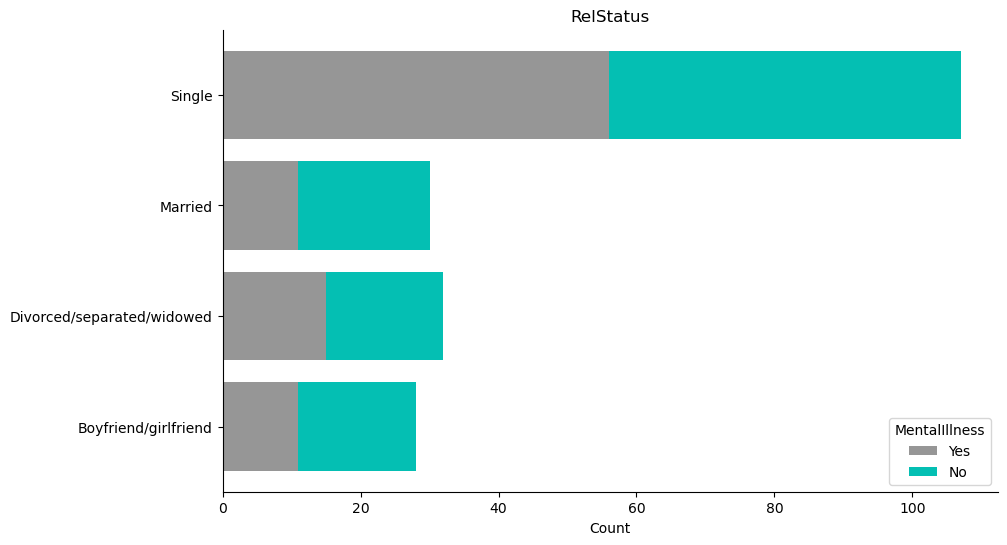

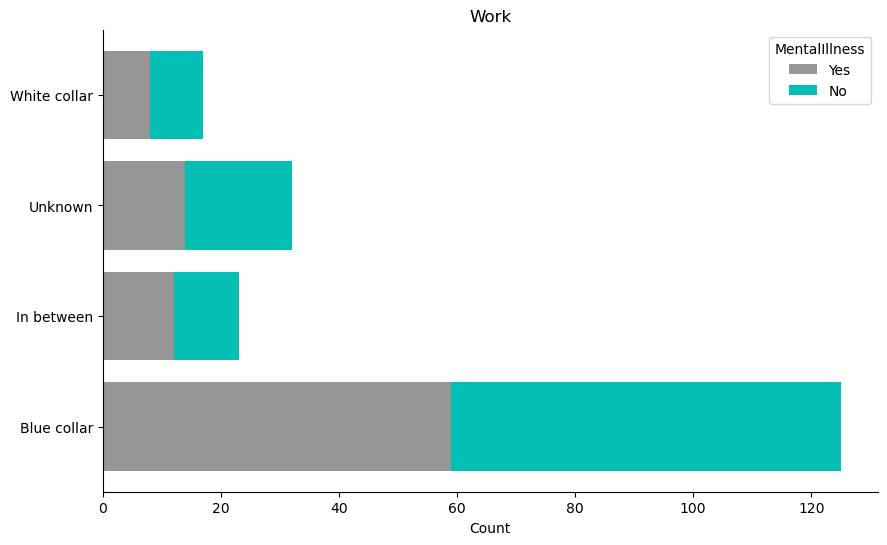

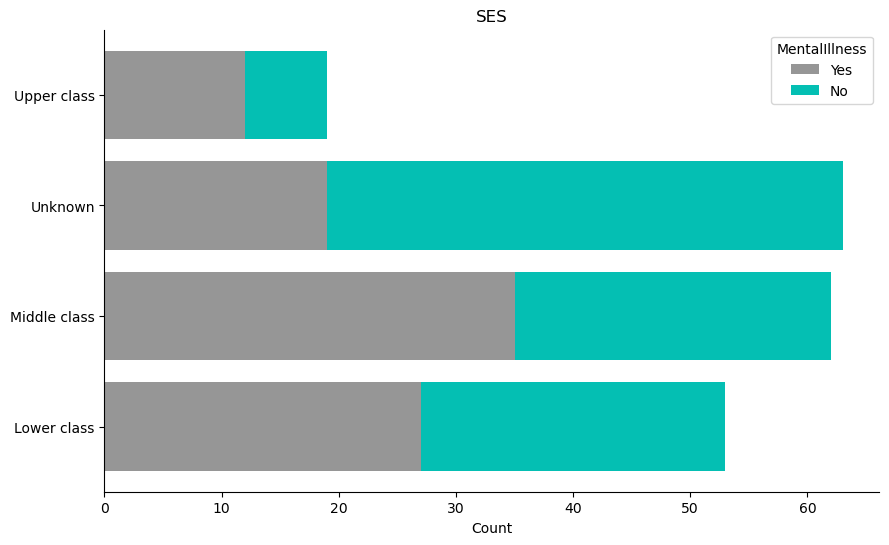

In [59]:
display_categorical_features(shooters_feat_eng_df, feature_categorical, feature_with_2_values[6])


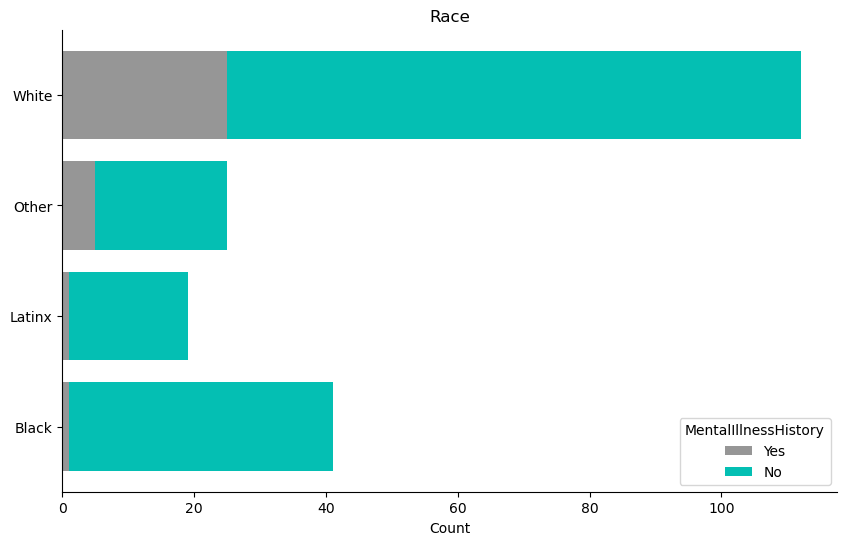

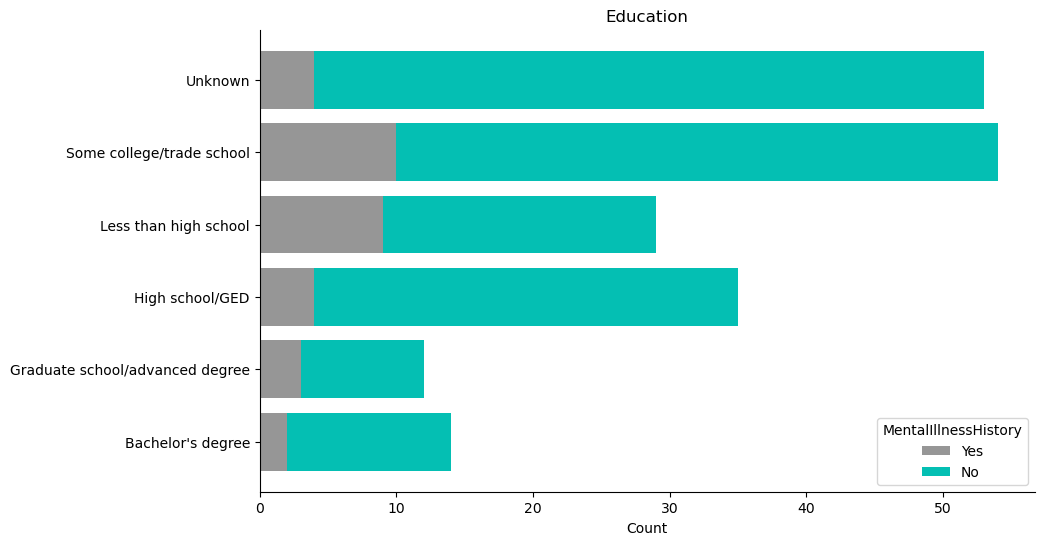

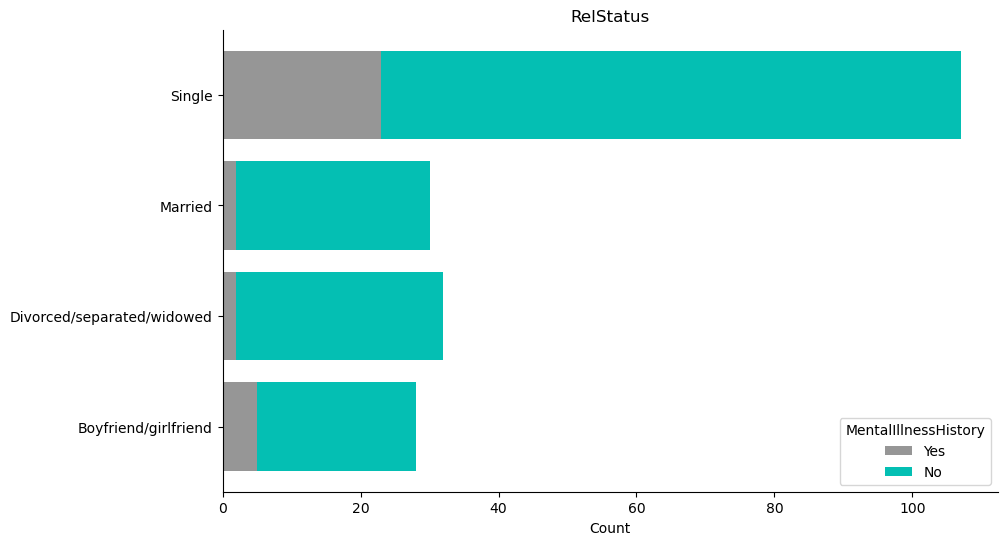

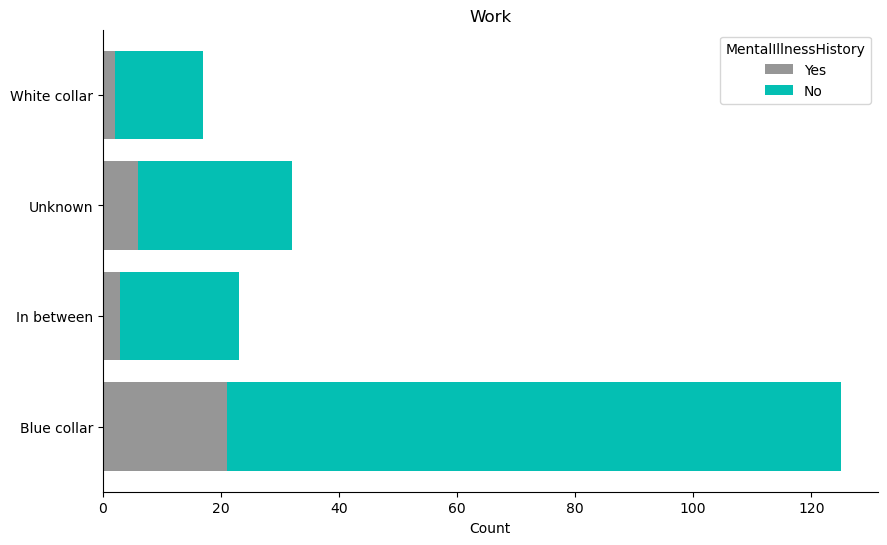

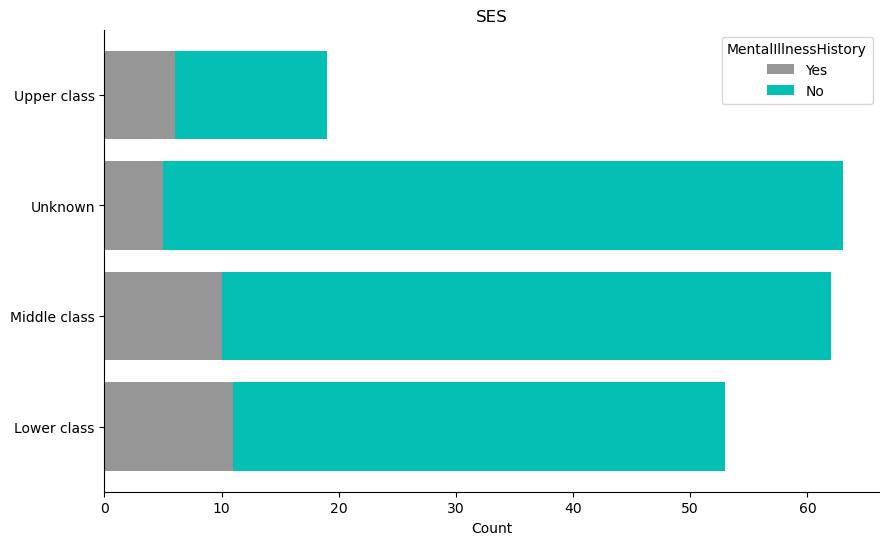

In [60]:
display_categorical_features(shooters_feat_eng_df, feature_categorical, feature_with_2_values[7])


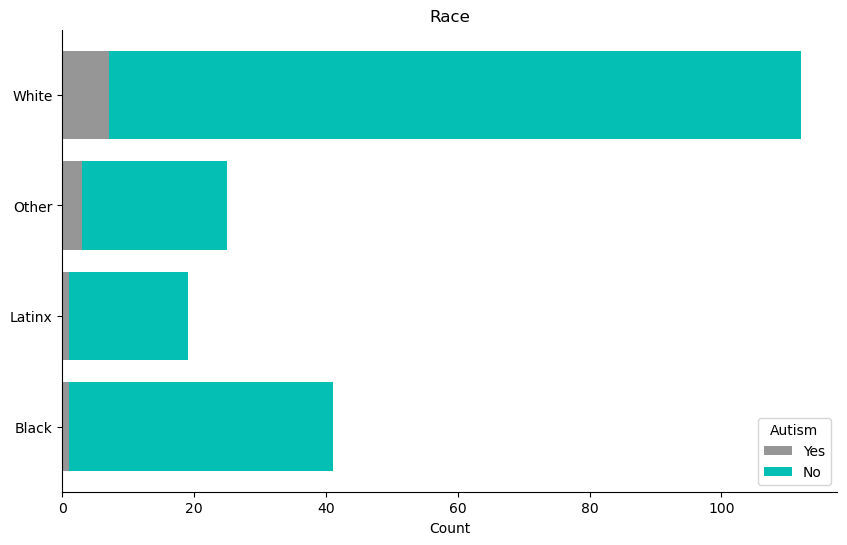

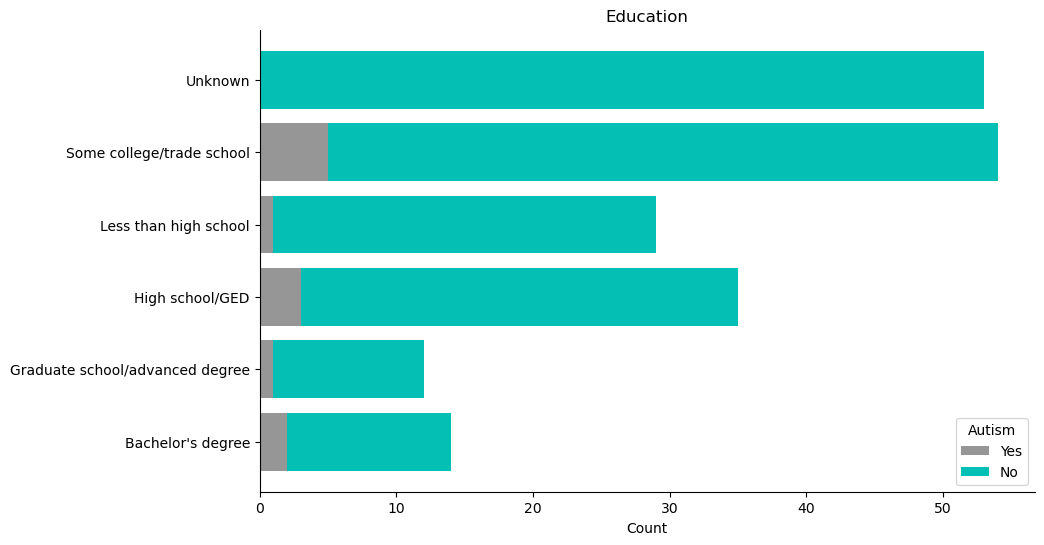

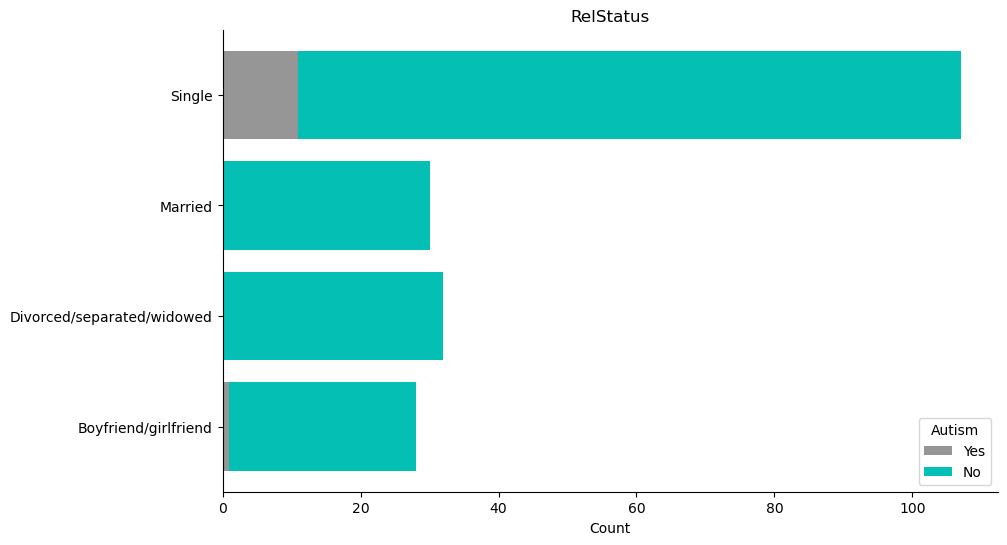

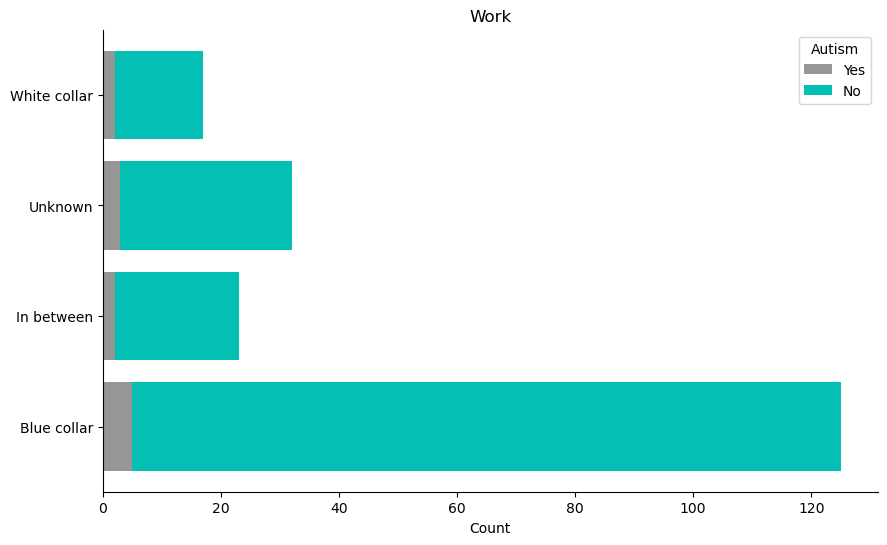

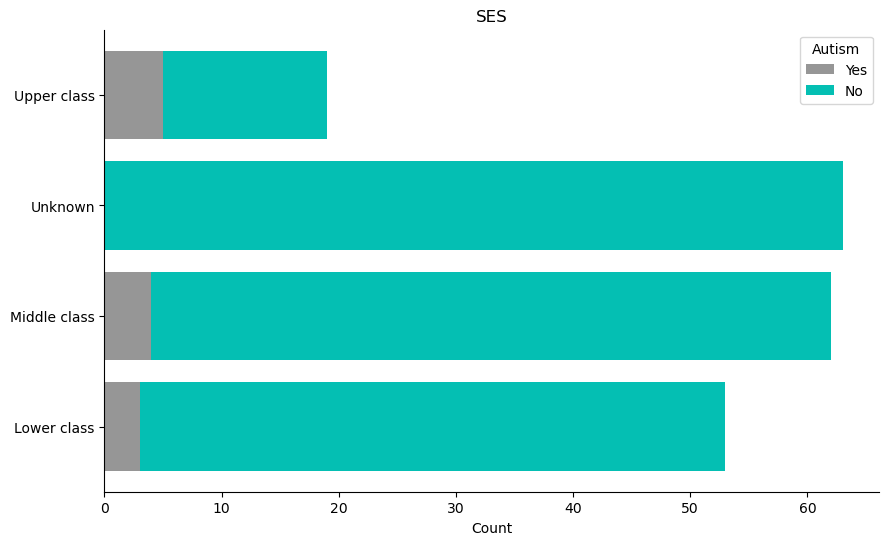

In [61]:
display_categorical_features(shooters_feat_eng_df, feature_categorical, feature_with_2_values[8])

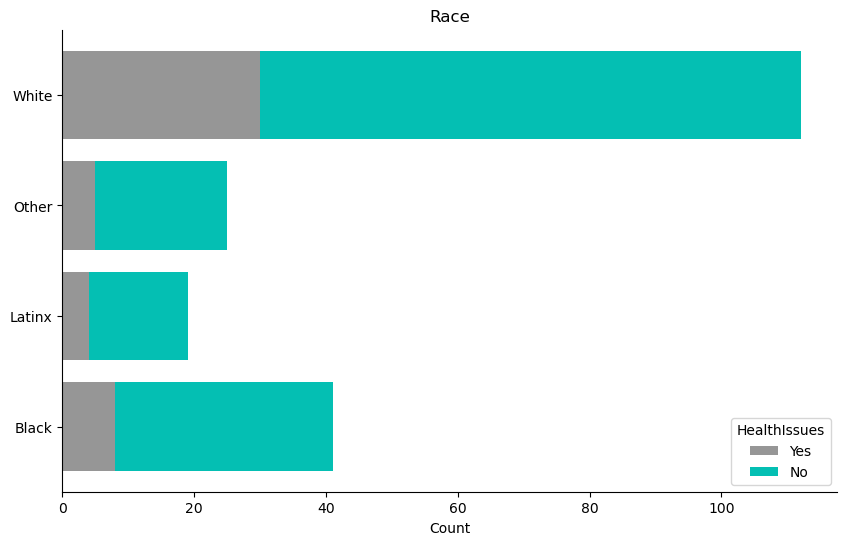

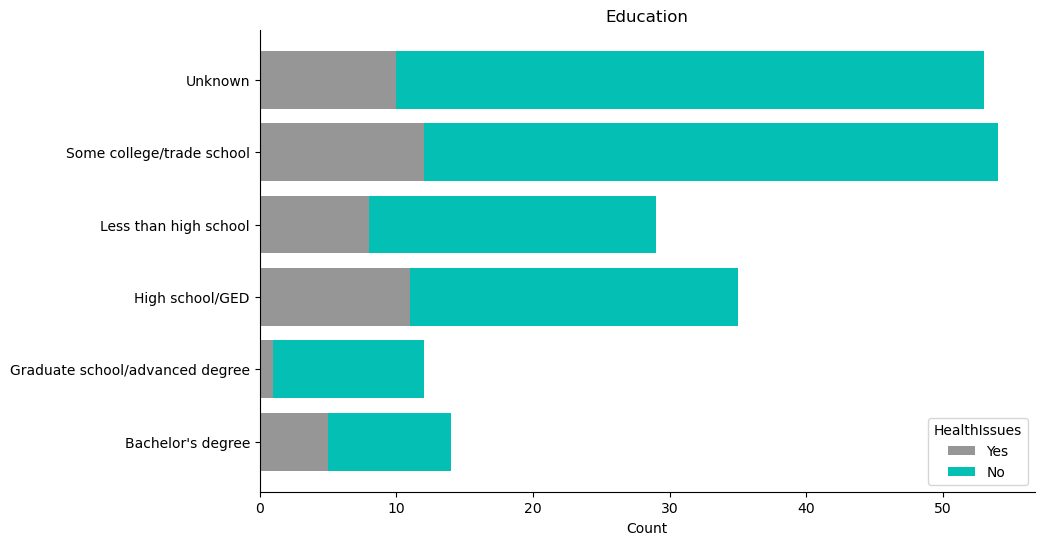

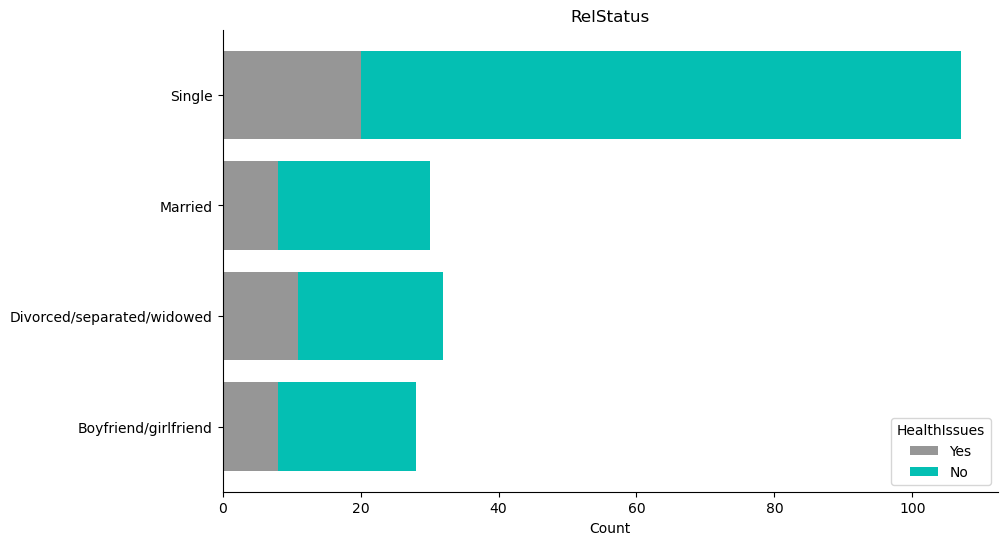

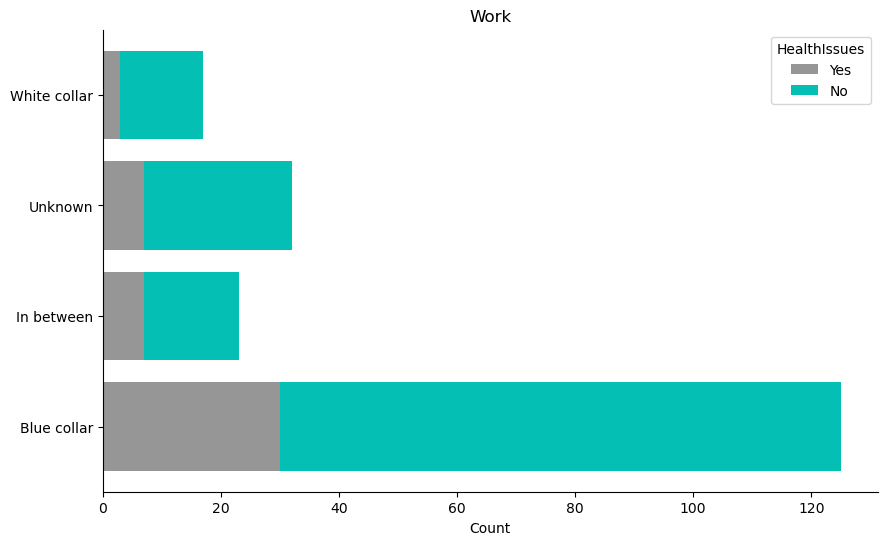

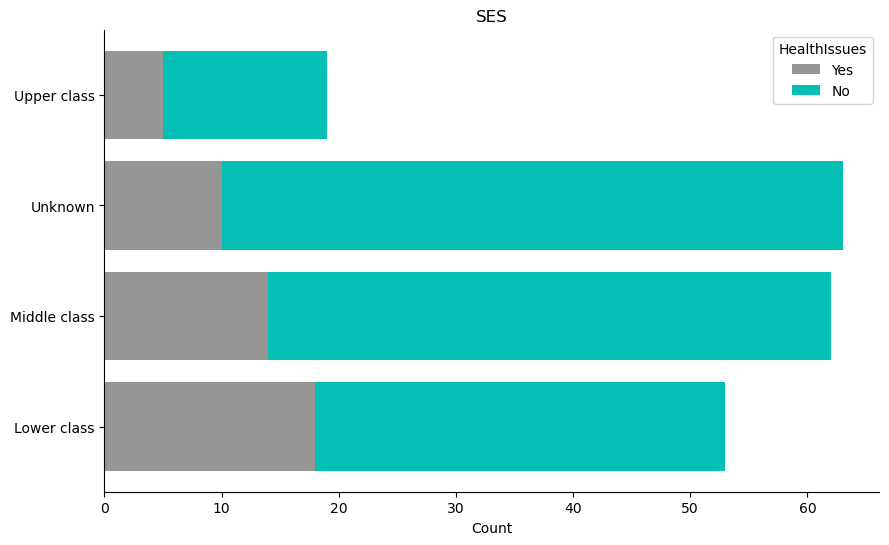

In [62]:
display_categorical_features(shooters_feat_eng_df, feature_categorical, feature_with_2_values[9])

## Correlation Matrix (shooter data only)
The different features of the dataset are very weakly correlated, if at all.

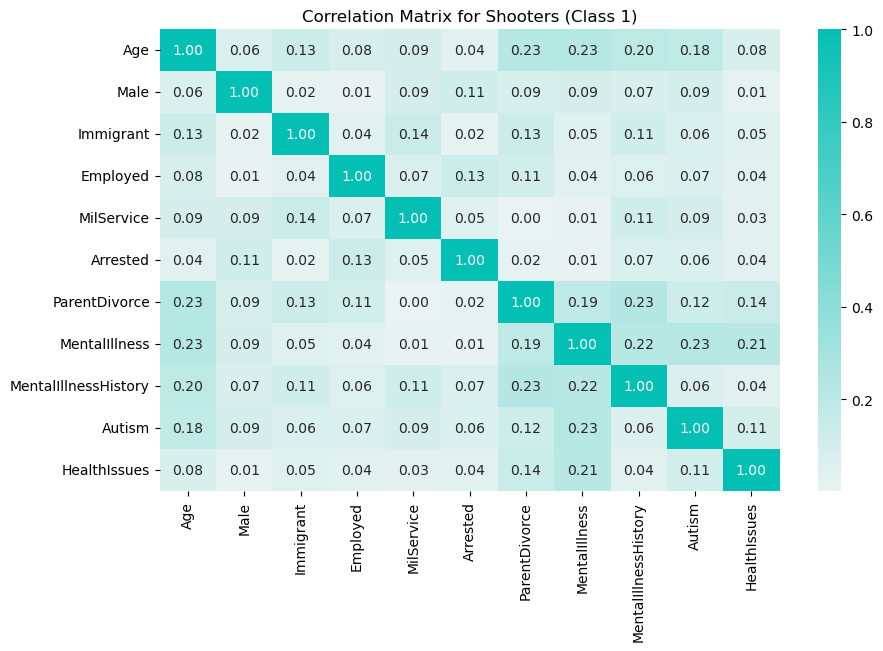

In [77]:
# Calculate correlation matrix (absolute values)
corr_matrix = shooters_feat_eng_df.corr(numeric_only=True).abs()

# Display correlation matrix as a heatmap
title = 'Correlation Matrix for Shooters (Class 1)'
corr_heatmap(corr_matrix, title)

## Comparison with general population statistics

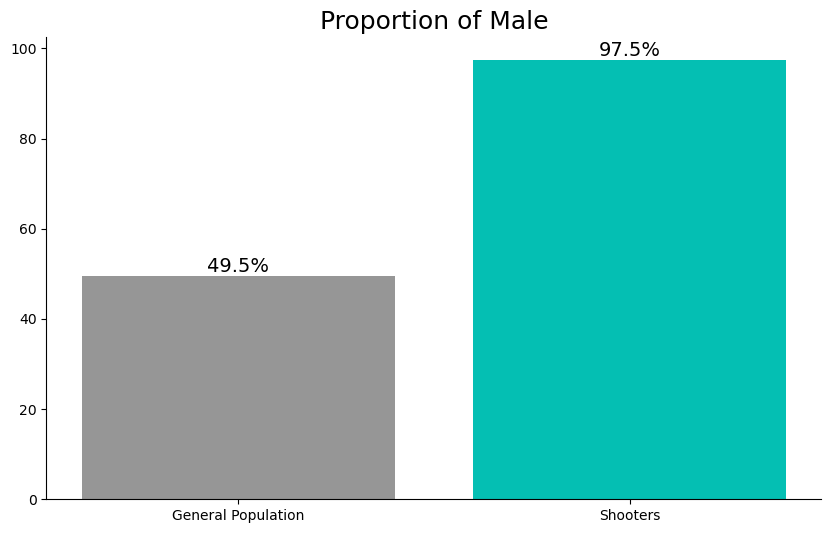

In [156]:
title = "Proportion of Male"
national_mean = 49.5 # source: https://statisticstimes.com/ (from UN (World Population Prospects 2022) published 27 Nov, 2023)
shooter_mean = 100*shooters_df['Male'].value_counts()[0]/len(shooters_df['Male'])
display_comparison_chart(national_mean, shooter_mean, title)

count    50.000000
mean     21.924600
std       2.621866
min      17.490000
25%      20.512500
50%      21.500000
75%      23.580000
max      29.680000
Name: RatesOfMentalIllness, dtype: float64


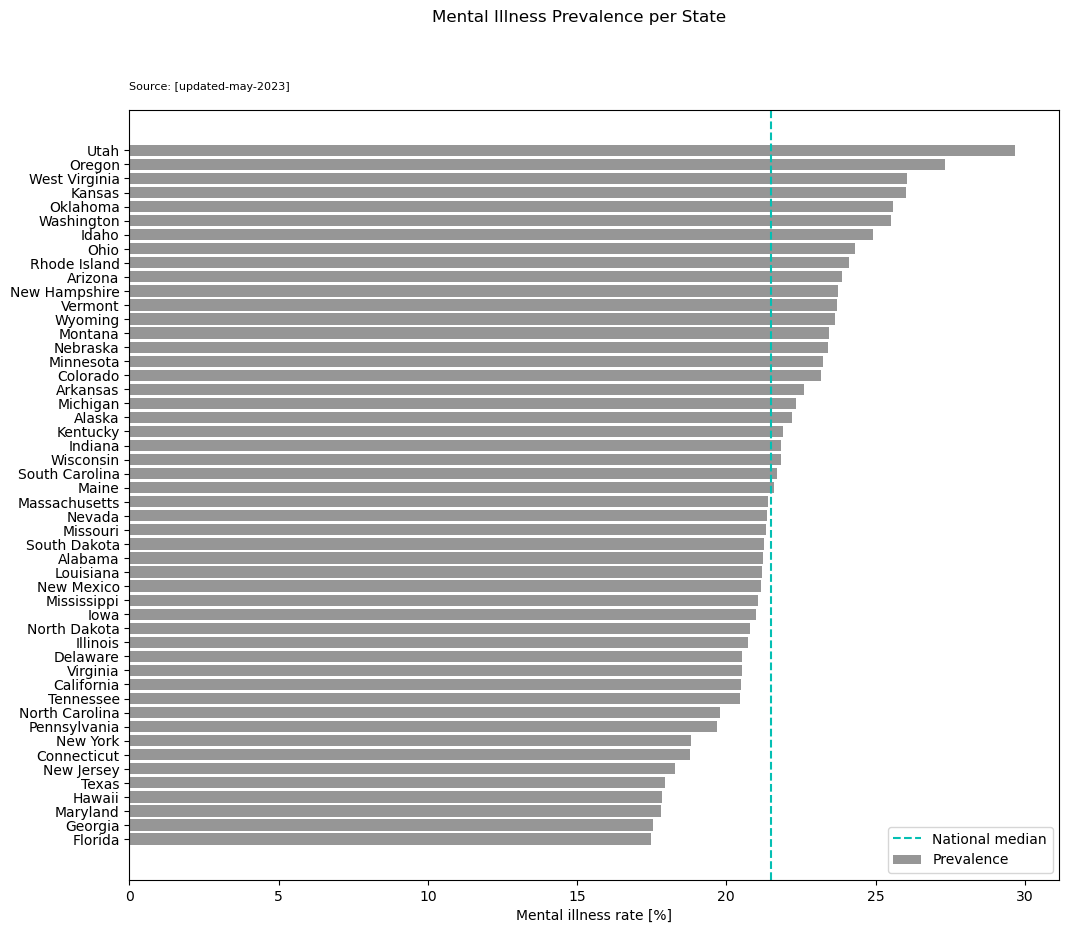

In [79]:
csv = Path('../Datasets/raw_data/mental-health-statistics-by-state-[updated-may-2023].csv')
cases_df = pd.read_csv(csv)

cases_df.describe()

cases_df['state'].nunique()

print(f"{cases_df['RatesOfMentalIllness'].describe()}")

fig, ax = plt.subplots(figsize=(12,10))

# Mirror DataFrame
cases_df = cases_df[::-1]

ax.barh(cases_df['state'], cases_df['RatesOfMentalIllness'], label='Prevalence', color=main_color)
ax.axvline(cases_df['RatesOfMentalIllness'].median(), ls='--', c=highlight_color, label='National median')

ax.set_xlabel('Mental illness rate [%]')

fig.suptitle('Mental Illness Prevalence per State')
fig.text(x=0.125, y=0.9, s='Source: [updated-may-2023]', fontsize=8)

ax.legend()

plt.show()

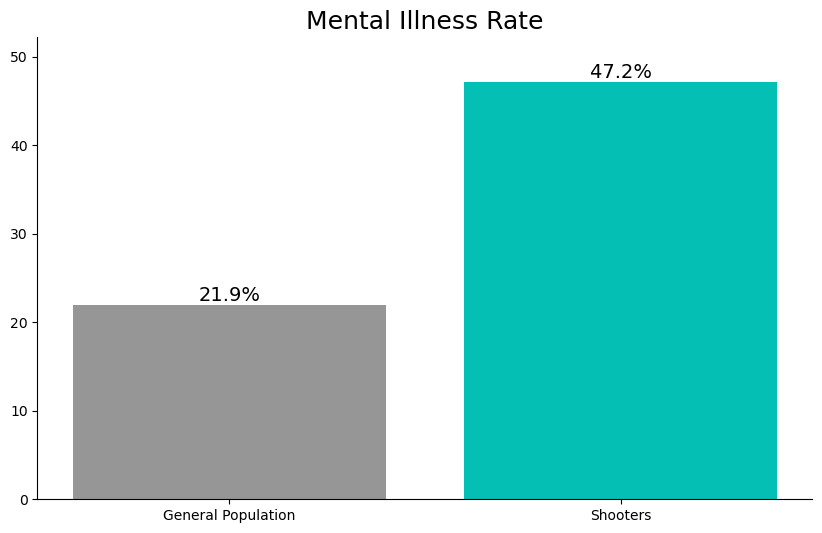

In [154]:
title = "Mental Illness Rate"
national_mean = cases_df['RatesOfMentalIllness'].mean()
shooter_mean = 100*shooters_feat_eng_df['MentalIllness'].mean()
display_comparison_chart(national_mean, shooter_mean, title)

## Age distribution (general male population)

In [66]:
genpop_df = pd.read_csv('../Datasets/clean_data/clean_male_population_age.csv')

# Drop Puerto Rico
genpop_df = genpop_df.loc[genpop_df['state'] != 'PR',:]

# Get country-wide age distribution
age = pd.DataFrame(genpop_df.sum()).T.drop(columns=['state', 'Total Population'])

In [67]:
# Group ages in equal buckets of 10 years
decades = pd.DataFrame({
    '<10': age['Under 10 years old'],
    '10-19': age['10 to 14 years'] + age['15 to 17 years'] + age['18 and 19 years'],
    '20-29': age['20 years'] + age['21 years'] + age['22 to 24 years'] + age['25 to 29 years'],
    '30-39': age['30 to 34 years'] + age['35 to 39 years'],
    '40-49': age['40 to 44 years'] + age['45 to 49 years'],
    '50-59': age['50 to 54 years'] + age['55 to 59 years'],
    '60-69': age['60 and 61 years'] + age['62 to 64 years'] + age['65 and 66 years'] + age['67 to 69 years'],
    '>70': age['70 to 74 years'] + age['75 years and over']
}).T.reset_index()

In [68]:
shooter_age = pd.DataFrame(shooters_df['Age'])

bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]
group_names = decades['index'].values

shooter_age['Bracket'] = pd.cut(shooters_df["Age"], bins, labels=group_names, include_lowest=True)
shooter_age = pd.DataFrame(shooter_age['Bracket'].value_counts())
shooter_age = shooter_age.T[decades['index'].values].T

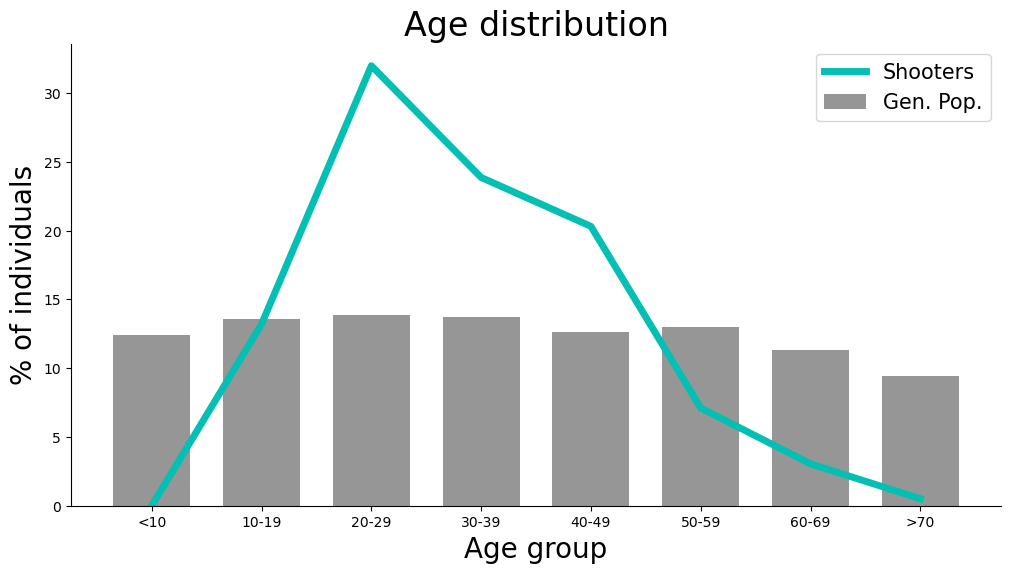

In [124]:
# Create figure
fig, ax = plt.subplots(figsize=(12,6))

sns.despine()

# Add genpop and shooters age distribution
ax.bar(decades['index'], 100*decades[0]/decades[0].sum(), label='Gen. Pop.', width=0.7, facecolor=main_color)
ax.plot(decades['index'], 100*shooter_age['Bracket']/shooter_age['Bracket'].sum(), label='Shooters', c=highlight_color, linewidth=5)

# Add labels and information
ax.set_title('Age distribution', fontsize=24)
ax.set_xlabel('Age group', fontsize=20)
ax.set_ylabel('% of individuals', fontsize=20)
ax.legend(fontsize=15)

# Show plot
plt.show()

## Arrest rate

In [127]:
arrests = pd.read_csv('../Datasets/raw_data/FBI_2018_crimeByStates.csv')

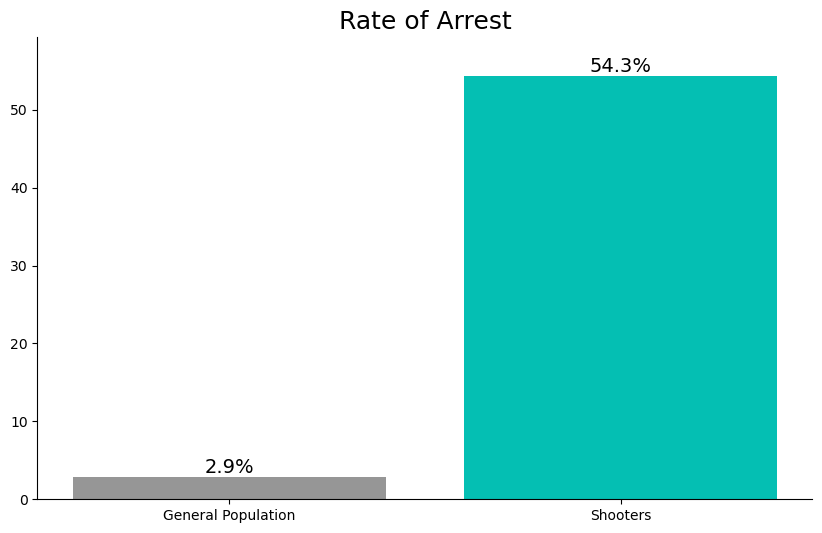

In [153]:
title = "Rate of Arrest"
national_mean = 100*arrests['Rate'].mean()
shooter_mean = 100*shooters_feat_eng_df['Arrested'].mean()
display_comparison_chart(national_mean, shooter_mean, title)

## Unemployment

In [129]:
unemployment = pd.read_csv('../Datasets/raw_data/unemployment-rate-by-state-[updated-august-2023].csv')

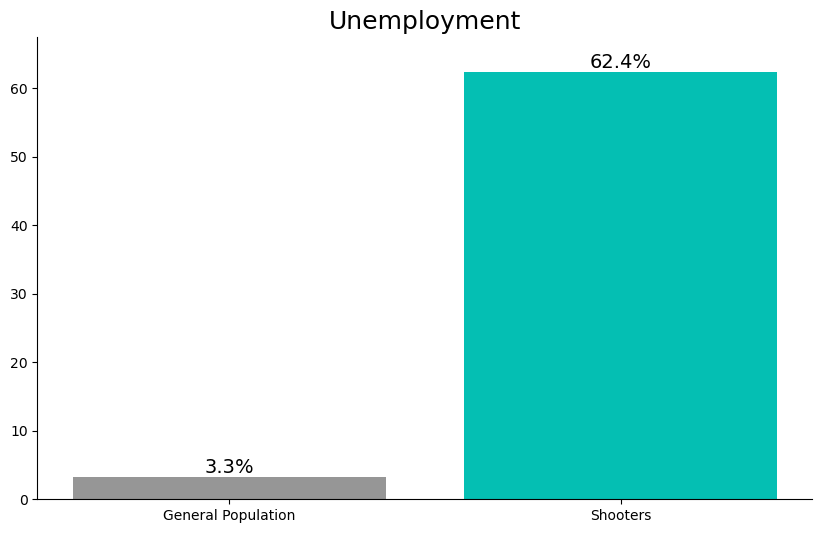

In [152]:
title = "Unemployment"
national_mean = unemployment['unemploymentRateJuly2022'].mean()
shooter_mean = 100*(1-shooters_feat_eng_df['Employed'].mean())
display_comparison_chart(national_mean, shooter_mean, title)

## Autism

In [135]:
autism = pd.read_csv('../Datasets/clean_data/clean_autism.csv')

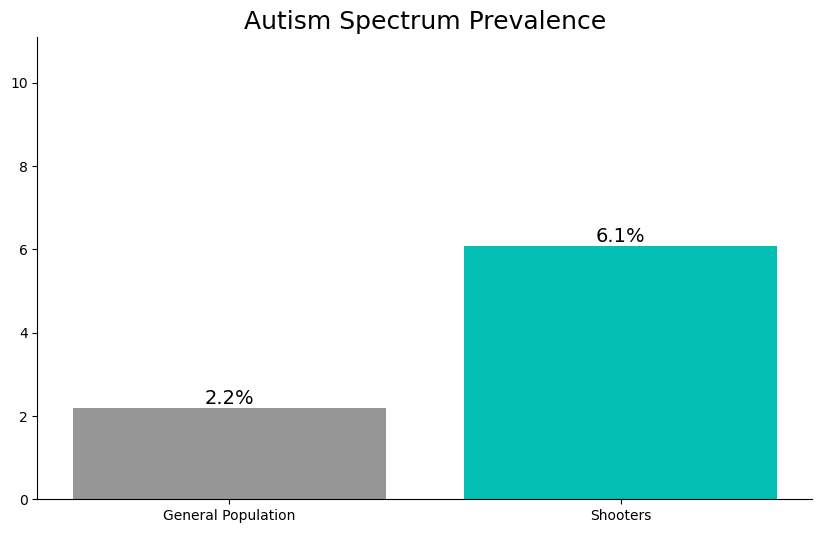

In [151]:
title = "Autism Spectrum Prevalence"
national_mean = autism['Prevalence'].mean()
shooter_mean = 100*shooters_feat_eng_df['Autism'].mean()
display_comparison_chart(national_mean, shooter_mean, title)